# MARCEL JONES RAYMOND


# Part A

# DOMAIN:
Healthcare

# CONTEXT:
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

# DATA DESCRIPTION:
The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

# Import Library

In [81]:
# Numbers
import pandas as pd
import numpy as np

# plots
import  seaborn as sns
import matplotlib.pyplot as plt

# 3d image
from mpl_toolkits.mplot3d import Axes3D

#split data
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,StratifiedKFold
from scipy.stats import f_oneway,ttest_ind
from scipy.stats import ttest_ind,chi2_contingency

# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
import statsmodels.api as sm 
from statsmodels.stats.weightstats import ztest

# counting
from collections import Counter

# handle imbalance data
from imblearn.over_sampling import SMOTE,SMOTENC

# metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,classification_report
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn import neighbors, datasets
from sklearn.metrics import f1_score,classification_report,confusion_matrix,recall_score,precision_score,roc_auc_score,accuracy_score


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Text color
from colorama import Fore,Style
sns.set()

# Import and warehouse data:

In [2]:
db1=pd.read_csv('Part1 - Normal.csv')
db2=pd.read_csv('Part1 - Type_H.csv')
db3=pd.read_csv('Part1 - Type_S.csv')

In [3]:
print("db1 shape: ",db1.shape)
print("db2 shape: ",db2.shape)
print("db3 shape: ",db3.shape)

db1 shape:  (100, 7)
db2 shape:  (60, 7)
db3 shape:  (150, 7)


In [4]:
data=pd.concat([db1,db2,db3],axis=0)
print("Shape of the complete dataset: ",data.shape)

Shape of the complete dataset:  (310, 7)


In [5]:
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [6]:
data.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
149,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [8]:
data.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [9]:
cols=data.columns
print(cols)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


#### Checking for the unwanted data

In [10]:
for i in cols:
    print(i," ;", sum( (data[i]=="?") | (data[i]=="-") |(data[i]==":")  |  (data[i]==";") | (data[i]==None)))

P_incidence  ; 0
P_tilt  ; 0
L_angle  ; 0
S_slope  ; 0
P_radius  ; 0
S_Degree  ; 0
Class  ; 0


In [11]:
data["Class"].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

#### Replacing with correct data

In [12]:
data['Class']=data['Class'].replace({'Nrmal': 'Normal','type_h':'Type_H',"tp_s":"Type_S"})

In [13]:
data['Class'].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [14]:
data['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [15]:
data["Class"]=data['Class'].astype("category")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 17.4 KB


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


### Data types were in correct format and replaced the values from class .There were no null values therefore no need to drop the data

# Data analysis & visualisation:

#### Numeric value visualisation

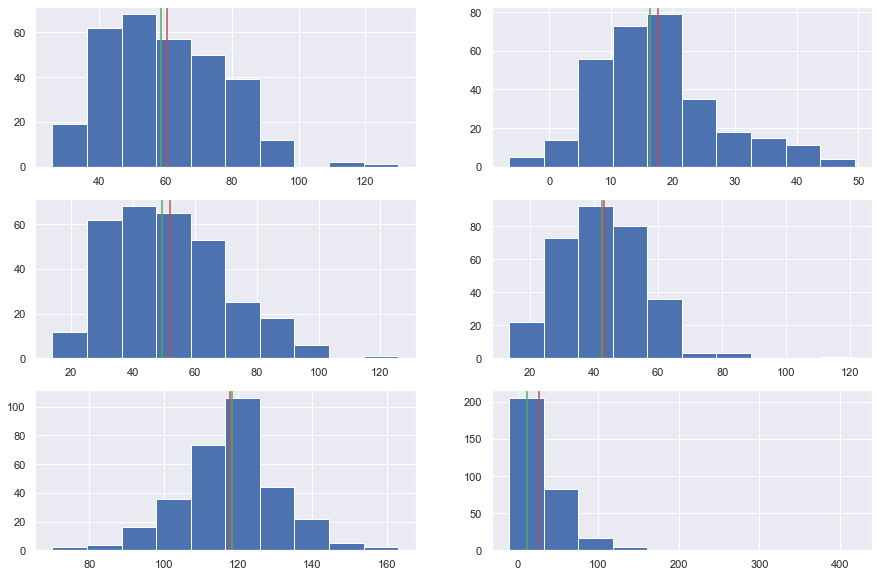

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
for i,j in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(3,2,i+1)
    plt.hist(data[j])
    plt.axvline(data[j].mean(),color="r")
    plt.axvline(data[j].median(),color="g")

<AxesSubplot:>

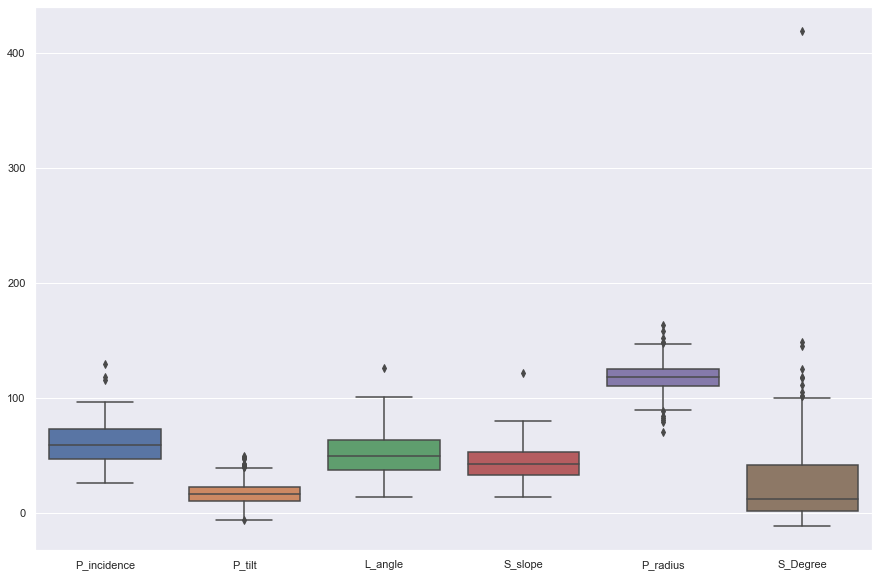

In [19]:
sns.boxplot(data=data.iloc[:,:-1])

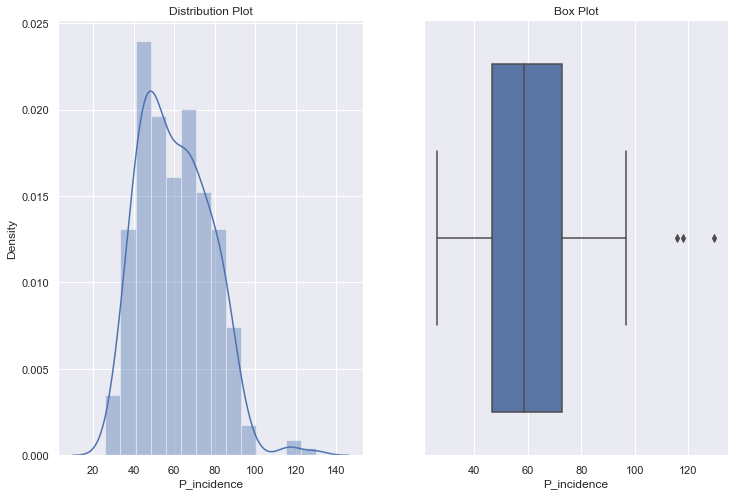

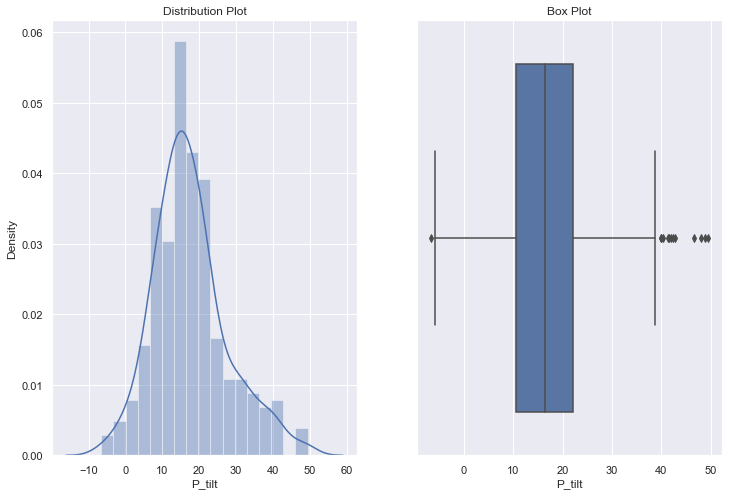

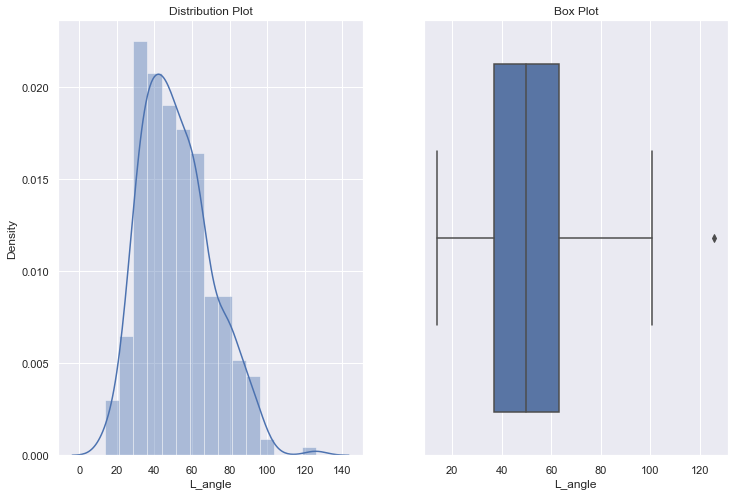

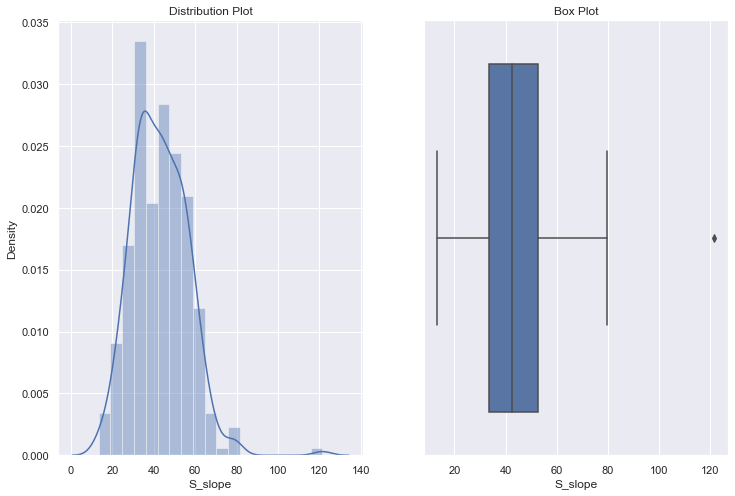

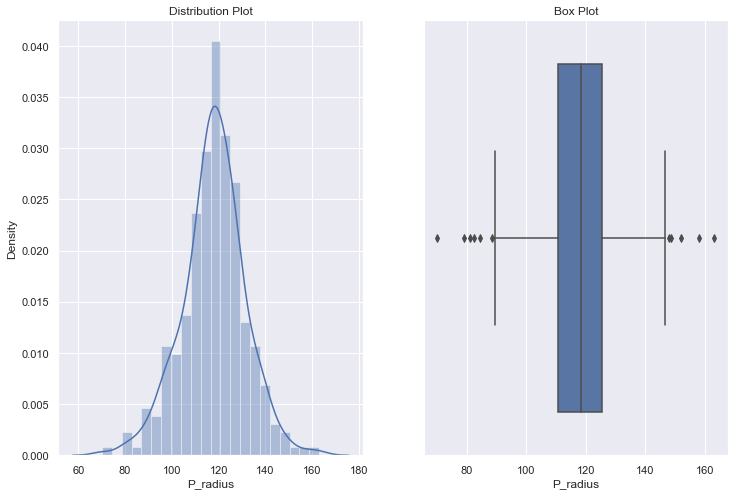

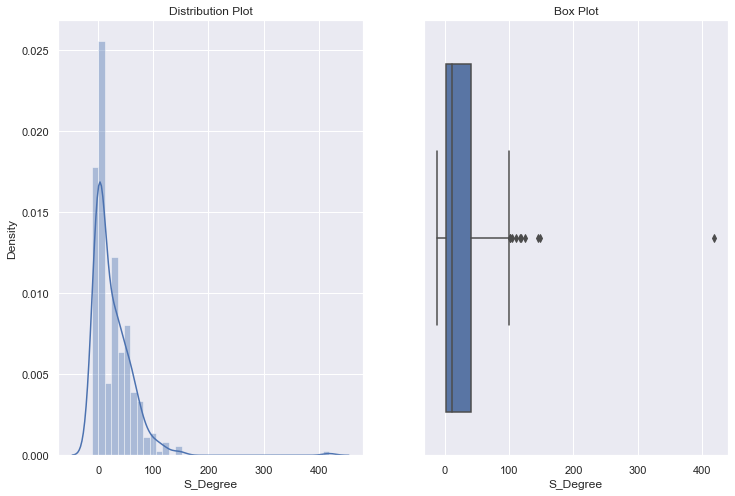

In [20]:
for i, var in enumerate(data.iloc[:,:-1].columns):
    fig,ax=plt.subplots(1,2,figsize=(12,8))
    sns.distplot(data[var],ax=ax[0])
    sns.boxplot(data[var],ax=ax[1])
    ax[0].set_title("Distribution Plot")
    ax[1].set_title("Box Plot")

#### We can see that there are lot of outliers so it is important to handle them , therefore we will be replacing them with mean values

In [21]:
for i,var in enumerate(data.iloc[:,:-1]):
    q25,q75=np.percentile(data[var],25),np.percentile(data[var],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    outliers=[i for i in data[var] if i < lower or i > upper]
    print("Lower value for ''{}'' is ''{}''".format(lower,var))
    print('Upper value for ''{}'' is ''{}'' '.format(upper,var))
    print('Number of Outliers ''{}'' is ''{}'' '.format(var,len(outliers)))
    print("mean value for ''{}'' is ''{}'': ".format(var,data[var].mean()))
    data_mean=data[var].mean()
    data[var]=np.where(data[var]>upper,data_mean,data[var])
    data[var]=np.where(data[var]<lower,data_mean,data[var])
    Outliers=[i for i in data[var] if i<lower or i>upper]
    print('Number of Outliers  after handling ''{}'' is ''{}'' '.format(var,len(Outliers)))
    print("")

Lower value for ''6.759192260000006'' is ''P_incidence''
Upper value for 112.54879745999999 is P_incidence 
Number of Outliers P_incidence is 3 
mean value for ''P_incidence'' is ''60.49665292951615'': 
Number of Outliers  after handling P_incidence is 0 

Lower value for ''-6.512919459999999'' is ''P_tilt''
Upper value for 39.30038326 is P_tilt 
Number of Outliers P_tilt is 13 
mean value for ''P_tilt'' is ''17.542821967970955'': 
Number of Outliers  after handling P_tilt is 0 

Lower value for ''-1.9999999850000023'' is ''L_angle''
Upper value for 101.99999997500001 is L_angle 
Number of Outliers L_angle is 1 
mean value for ''L_angle'' is ''51.93092960345161'': 
Number of Outliers  after handling L_angle is 0 

Lower value for ''4.323972498750003'' is ''S_slope''
Upper value for 81.71903786875001 is S_slope 
Number of Outliers S_slope is 1 
mean value for ''S_slope'' is ''42.953830961419364'': 
Number of Outliers  after handling S_slope is 0 

Lower value for ''88.57147911250001'' i

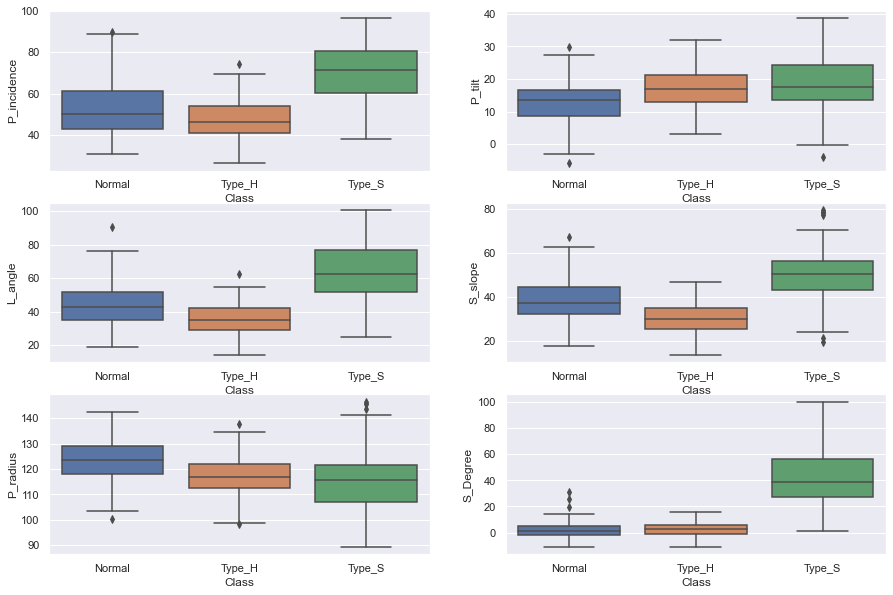

In [22]:
for i,var in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(data['Class'],data[var])

### catagorial value  visualisation

<AxesSubplot:xlabel='Class', ylabel='count'>

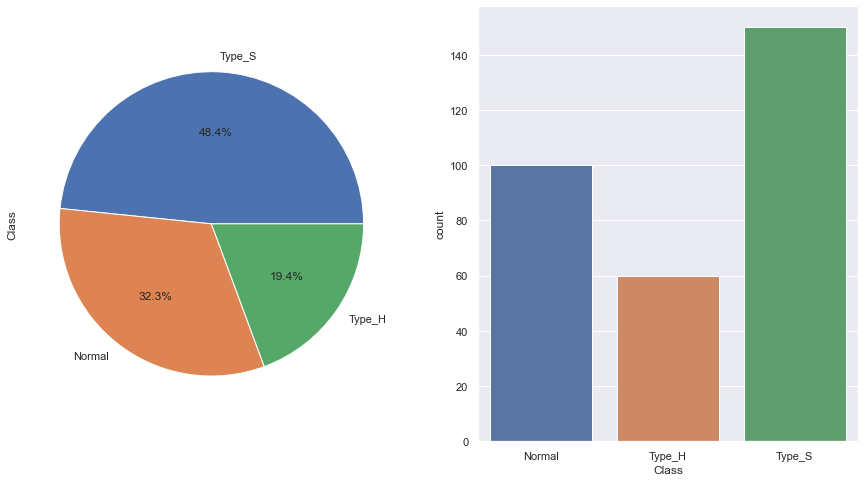

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
data["Class"].value_counts().plot(kind='pie', autopct="%1.1f%%",ax=ax[0])
sns.countplot(data['Class'],ax=ax[1])

<AxesSubplot:xlabel='P_tilt', ylabel='S_slope'>

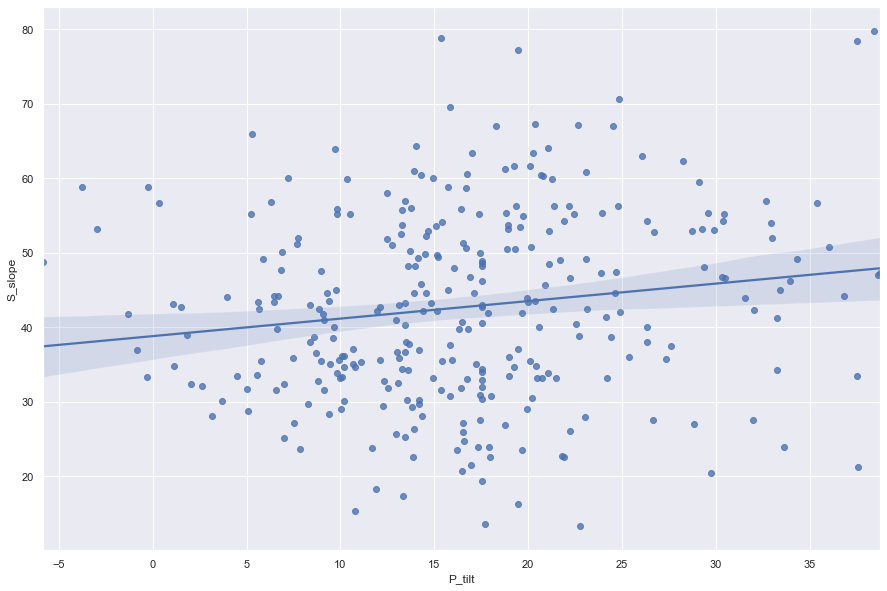

In [24]:
sns.regplot(data["P_tilt"],data['S_slope'])

Text(0.5, 0, 'L_angle')

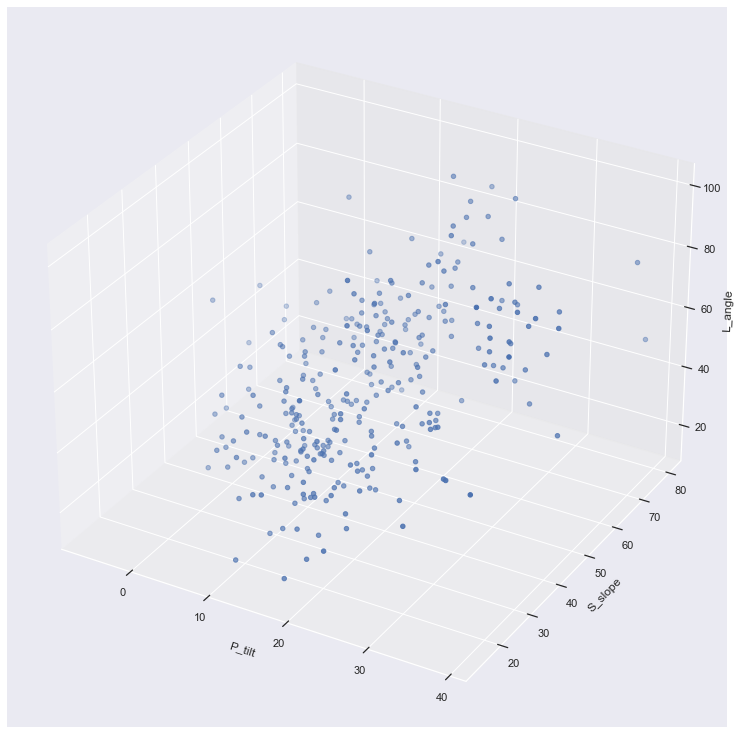

In [25]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(data["P_tilt"],data['S_slope'],data['L_angle'])
ax.set_xlabel("P_tilt")
ax.set_ylabel("S_slope")
ax.set_zlabel("L_angle")

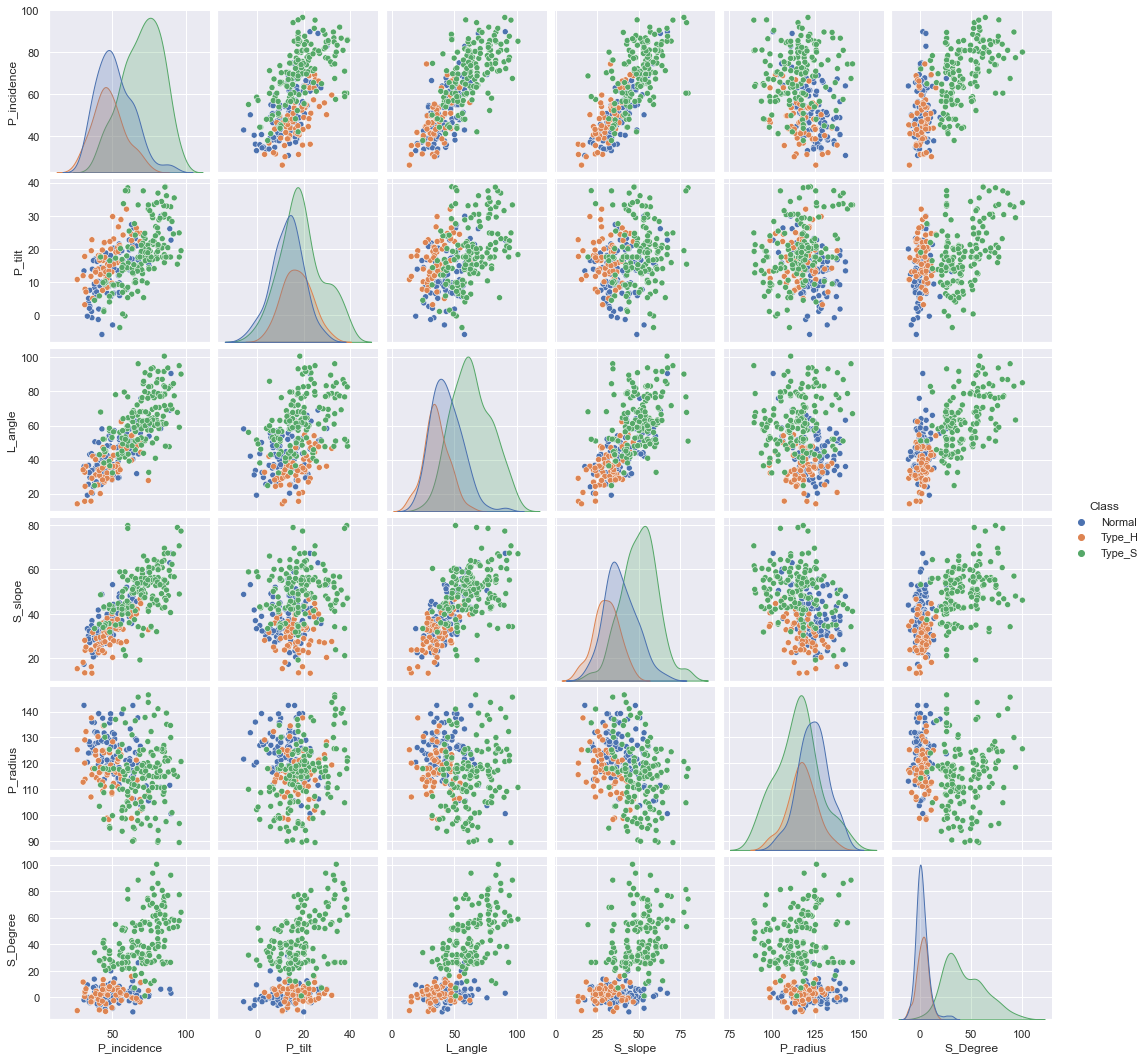

In [26]:
sns.pairplot(data ,hue='Class')

# Hypotesis Testing

### HO:There is no significant Difference  to the target variable 


### Ha:There is a significant Difference  to the target variable

In [27]:
for i in data.iloc[:,:-1]:
    normal=data[data['Class']=="Normal"][i]
    type_h=data[data['Class']=="Type_H"][i]
    type_s=data[data['Class']=="Type_S"][i]
    f_stats,pval=f_oneway(normal,type_h,type_s)
    if pval<0.05:
        print("P value for {} is {}  therefore Reject the Null ".format(i,pval))
    else:
        print("P value for {} is {}  therefore Fail to reject the Null ".format(i,pval))

P value for P_incidence is 1.7191496475033583e-34  therefore Reject the Null 
P value for P_tilt is 4.0408155019587247e-08  therefore Reject the Null 
P value for L_angle is 1.193499332737743e-38  therefore Reject the Null 
P value for S_slope is 1.0197675381952586e-33  therefore Reject the Null 
P value for P_radius is 3.4763596759625546e-09  therefore Reject the Null 
P value for S_Degree is 1.6966810247438447e-75  therefore Reject the Null 


### All feature has impact on the target values

In [28]:
data.corr().style.background_gradient('magma')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.590099,0.775510,0.771431,-0.243852,0.666974
P_tilt,0.590099,1.000000,0.417565,0.156046,0.056477,0.419389
L_angle,0.775510,0.417565,1.000000,0.677937,-0.099424,0.701870
S_slope,0.771431,0.156046,0.677937,1.000000,-0.349883,0.567821
P_radius,-0.243852,0.056477,-0.099424,-0.349883,1.000000,-0.176713
S_Degree,0.666974,0.419389,0.701870,0.567821,-0.176713,1.000000


### There is a strong impact on all feature variables

# Data pre-processing:

#### Scaling The Predictor variables

In [29]:
x=data.copy()
x

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,17.542822,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [30]:
scaler=MinMaxScaler()
data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])

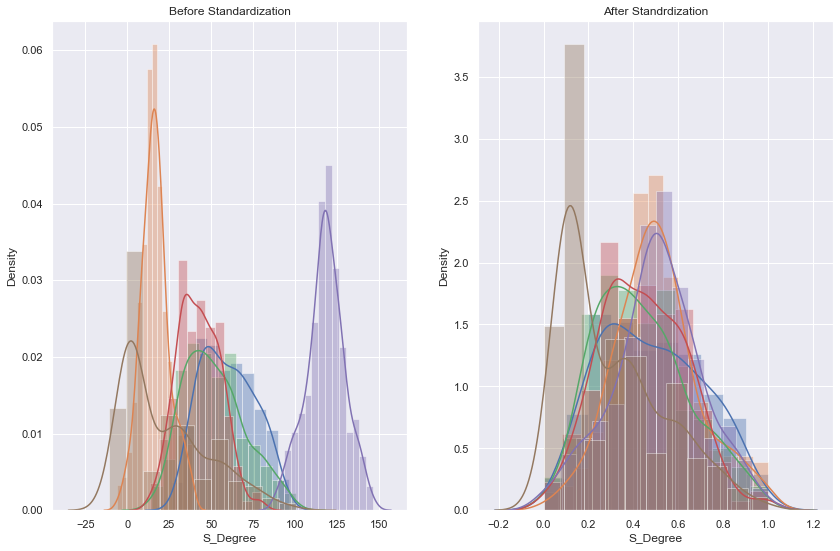

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,9))
for i, var in enumerate(data.iloc[:,:-1]):
    sns.distplot(x[var],ax=ax1)
    ax1.set_title("Before Standardization")
    
for i, var in enumerate(data.iloc[:,:-1]):
    sns.distplot(data[var],ax=ax2)
    ax2.set_title('After Standrdization')

### LabelEncoder

In [32]:
label=LabelEncoder()
data['Class']=label.fit_transform(data['Class'])

#### checking for data imbalance

<AxesSubplot:ylabel='Class'>

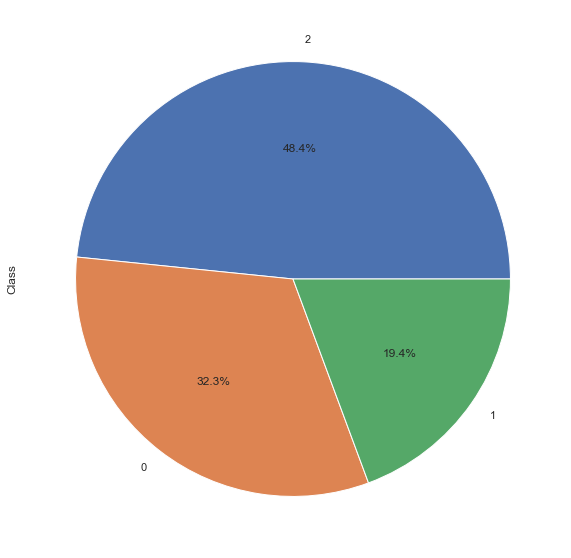

In [33]:
data["Class"].value_counts().plot(kind="pie",autopct="%1.1f%%")

#### There is a  huge imbalance in the data which might lead to lower accuracy and misclassification on the system

#### predictor Vs target

In [34]:
predictor=data.iloc[:,:-1]
target=data[['Class']]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(predictor,target,test_size=0.30, random_state=1)

# Model training, testing and tuning:

### Creating KNN model with no K value 

Accuracy score in Train dataset:  0.880184331797235
Accuracy score in  Test dataset:  0.7634408602150538

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        28
           1       0.56      0.53      0.55        17
           2       0.91      0.90      0.91        48

    accuracy                           0.76        93
   macro avg       0.70      0.70      0.70        93
weighted avg       0.77      0.76      0.76        93



<AxesSubplot:>

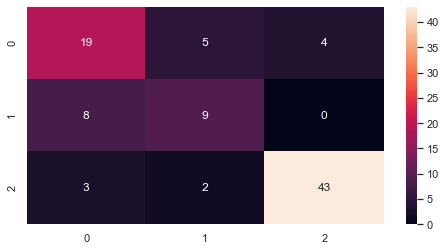

In [36]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
yhat_general=knn.predict(x_test)
print("Accuracy score in Train dataset: ",knn.score(x_train,y_train))
print("Accuracy score in  Test dataset: ",knn.score(x_test,y_test))
print("")
print(classification_report(y_test,yhat_general))
plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,yhat_general)),annot=True)

#### we can interpret that there is a good score between train and test dataset  there is no overfitting but precision and recall values of different target variables has  to be increased . Therefore  next we have to find best  k value to match the overall score

## Euclidean

The Optimal K value is  7
Accuracy score in Train dataset:  0.8663594470046083
Accuracy score in  Test dataset:  0.8064516129032258

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.67      0.71      0.69        17
           2       0.91      0.90      0.91        48

    accuracy                           0.81        93
   macro avg       0.77      0.77      0.77        93
weighted avg       0.81      0.81      0.81        93



<AxesSubplot:>

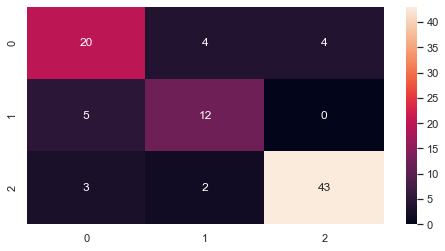

In [37]:
k_Val=np.arange(1,20,2)
score=[]
for i in k_Val:
    Knn=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    Knn.fit(x_train,y_train)
    Knn_score =Knn.predict(x_test)
    score.append(accuracy_score(y_test,Knn_score))
MSE=[1-i for i in score]
print("The Optimal K value is ",k_Val[MSE.index(min(MSE))])
knn =KNeighborsClassifier(n_neighbors=k_Val[MSE.index(min(MSE))])
knn.fit(x_train,y_train)
yhat_bestk=knn.predict(x_test)
print("Accuracy score in Train dataset: ",knn.score(x_train,y_train))
print("Accuracy score in  Test dataset: ",knn.score(x_test,y_test))
print("")
print(classification_report(y_test,yhat_bestk))
plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,yhat_bestk)),annot=True)

### precision and recall values has increased steadly by using euclidean metrics and target value '1' has to be increased which seems quite odd compared to other value and this can also be due to imbalance 

Text(0.5, 1.0, 'K value VS Score Euclidean')

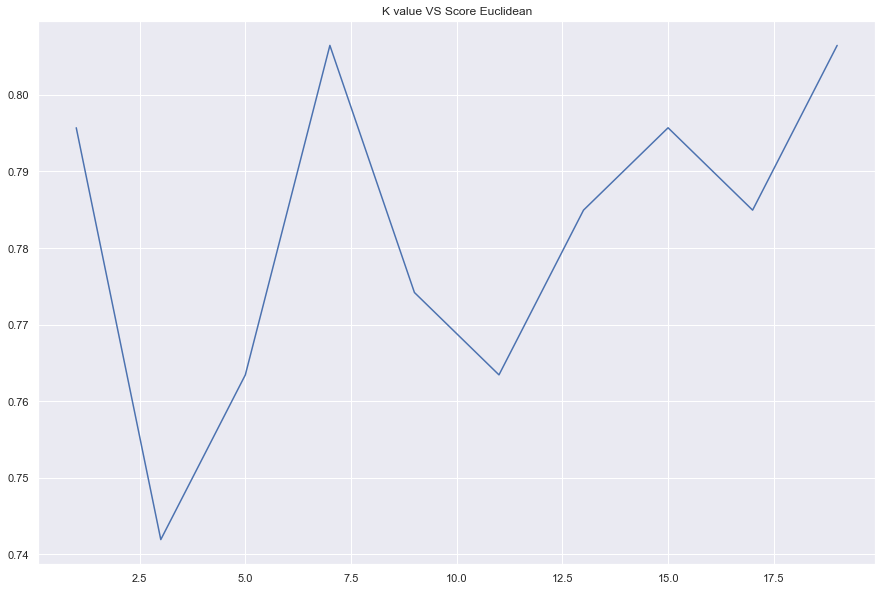

In [38]:
plt.plot(k_Val,score)
plt.title('K value VS Score Euclidean')

## Manhattan

The Optimal K value is  15
Accuracy score in Train dataset:  0.8248847926267281
Accuracy score in  Test dataset:  0.7956989247311828

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        28
           1       0.69      0.65      0.67        17
           2       0.91      0.90      0.91        48

    accuracy                           0.80        93
   macro avg       0.76      0.75      0.75        93
weighted avg       0.80      0.80      0.80        93



<AxesSubplot:>

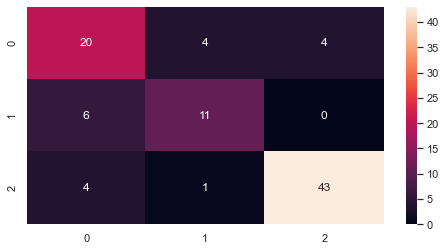

In [39]:
k_Val=np.arange(1,20,2)
score=[]
for i in k_Val:
    Knn=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    Knn.fit(x_train,y_train)
    Knn_score =Knn.predict(x_test)
    score.append(accuracy_score(y_test,Knn_score))
MSE=[1-i for i in score]
print("The Optimal K value is ",k_Val[MSE.index(min(MSE))])
knn =KNeighborsClassifier(n_neighbors=k_Val[MSE.index(min(MSE))])
knn.fit(x_train,y_train)
yhat_bestk=knn.predict(x_test)
print("Accuracy score in Train dataset: ",knn.score(x_train,y_train))
print("Accuracy score in  Test dataset: ",knn.score(x_test,y_test))
print("")
print(classification_report(y_test,yhat_bestk))
plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,yhat_bestk)),annot=True)

#### Train and test scores are petty good and has less variance in manhattan but overall precision and recall values has been decreased drastically which is not good for the model ,as for now it is better to go with eucludian metrics 

Text(0.5, 1.0, 'K value VS Score Manhattan')

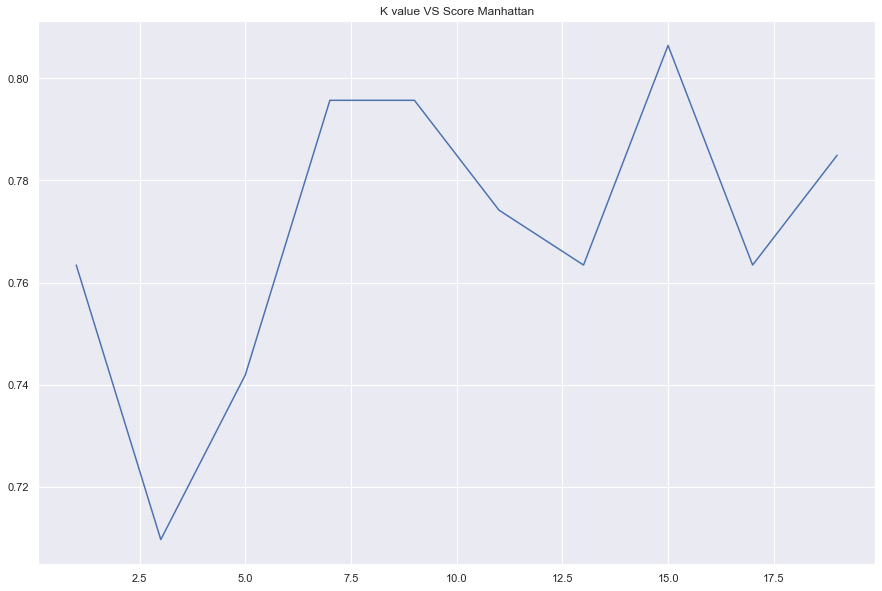

In [40]:
plt.plot(k_Val,score)
plt.title('K value VS Score Manhattan')

#### Since there is an imbalance in the target  values we will be trying to balance them by using SMOTE function in the train values because if we use them in the raw data it might lose some information and replace them with noise 

In [41]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10, shuffle=True)
k_val=np.arange(1,30,2)
print(k_val)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


In [53]:
trainscore=[]
testscore=[]
cross_val_f1_score=[]
kscore=[]
for j in k_val:
    knn=KNeighborsClassifier(n_neighbors=j)
    for train_ind,test_ind in kfold.split(predictor,target):
        
        X_train,X_test=predictor.iloc[train_ind],predictor.iloc[test_ind]
        Y_train,Y_test=target.iloc[train_ind],target.iloc[test_ind]
        sm=SMOTE()
        X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)
        knn.fit(X_train_res,Y_train_res)
        yhat=knn.predict(X_test)
        train=knn.score(X_train_res,Y_train_res)
        test=knn.score(X_test,Y_test)
        score=accuracy_score(Y_test,yhat)
        cross_val=metrics.f1_score(Y_test,yhat,average='macro')
    trainscore.append(train.mean())
    testscore.append(test.mean())
    kscore.append(score.mean())
    cross_val_f1_score.append(cross_val.mean())
print(" Max Test score: ",max(testscore))
print(" Max Train score: ",max(trainscore))
print(" Max Accuracy score: ",max(kscore))
print(" Max f1 score: ",max(cross_val_f1_score))
    

 Max Test score:  0.9032258064516129
 Max Train score:  1.0
 Max Accuracy score:  0.9032258064516129
 Max f1 score:  0.8882551205600208


In [54]:
best=k_val[cross_val_f1_score.index(max(cross_val_f1_score))]
print("The optimal number of neighbors is" ,best)

The optimal number of neighbors is 23


Text(0, 0.5, 'Cross Validation f1_score')

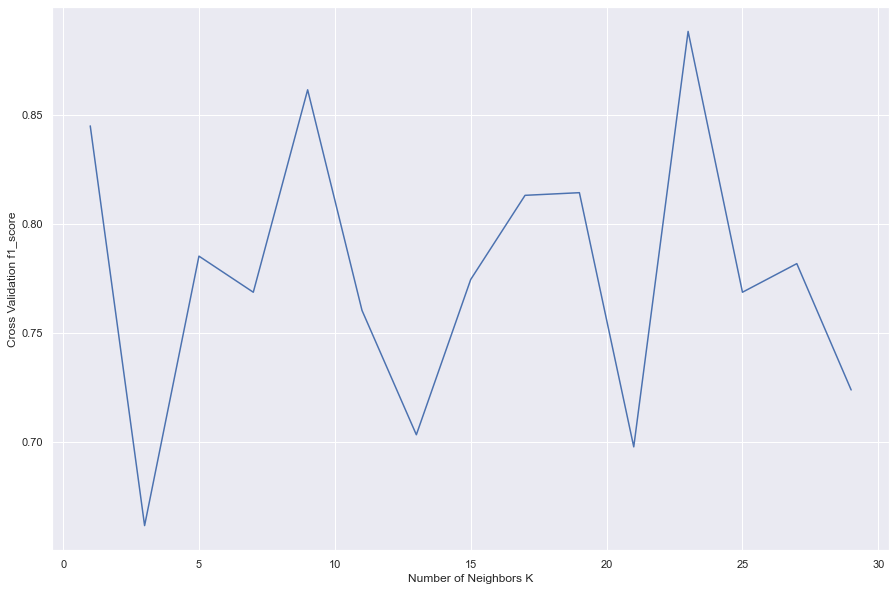

In [55]:
plt.plot(k_val, cross_val_f1_score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross Validation f1_score')

### the best k value is 23 and let us try implementing in the model

In [57]:
Knn=KNeighborsClassifier(n_neighbors=23)
Knn.fit(X_train_res,Y_train_res)
yhat=Knn.predict(X_test)
print("Train score: " ,Knn.score(X_train_res,Y_train_res))
print("Test score: ",Knn.score(X_test,Y_test))
print("accuracy_score: ", accuracy_score(Y_test,yhat))
print(classification_report(Y_test,yhat))

Train score:  0.8148148148148148
Test score:  0.8064516129032258
accuracy_score:  0.8064516129032258
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.50      0.67      0.57         6
           2       1.00      0.93      0.97        15

    accuracy                           0.81        31
   macro avg       0.76      0.77      0.76        31
weighted avg       0.83      0.81      0.82        31



####  the model has predicted better with the best k value ,and now good precision and recall values has improved

### tuning Hyperparameters using GridSearchCV

In [58]:
values={
'n_neighbors' : np.arange(1,30,2),
'weights' : ['uniform',"distance"],
'metric':['euclidean','manhattan'],
'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute']}

cross_val = KFold(n_splits=5)

Knn = KNeighborsClassifier()

gscv = GridSearchCV(estimator = Knn, param_grid = values, cv=cross_val)
gscv.fit(x_train,y_train)
print("Best parameter: ",gscv.best_params_)
print("Best Score ",gscv.best_score_)
print("Best Estomator ",gscv.best_estimator_)

Best parameter:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Score  0.8341437632135307
Best Estomator  KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')


In [59]:
vals=pd.DataFrame(gscv.cv_results_)
vals[['param_algorithm','param_n_neighbors','param_weights','mean_test_score']].sort_values(by = 'mean_test_score',ascending = False).head(3)

,param_algorithm,param_n_neighbors,param_weights,mean_test_score
101,ball_tree,11,distance,0.834144
221,brute,11,distance,0.834144
161,kd_tree,11,distance,0.834144


# . Conclusion and improvisation

### I have found that patients labeled with the "Type_H" and "Normal" classes have similar characteristics and there is no clear division between the two classes, while patients labeled with the "Type_S" class are more separate than the other two classes. In general, for the analyzed dataset, the techniques used are quite efficient, in fact in most cases the accuracy is around 80%.More features like  sex etc, will help us to gain more accuracy in future modeling quality of the data was perfect and quantity wise knn model fitted in accurately with less dataset


# Part B

# • DOMAIN:
Banking and finance

# CONTEXT:
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

# DATA DESCRIPTION:
The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card

# PROJECT OBJECTIVE:
Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.`

# Import and warehouse data

In [2]:
db1=pd.read_csv('Part2 - Data1.csv')
db1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [3]:
db2=pd.read_csv('Part2 -Data2.csv')
db2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [4]:
print("Shape od the dataset 2 is: ",db2.shape)

Shape od the dataset 2 is:  (5000, 7)


In [5]:
data=pd.merge(db1,db2,on='ID',how="outer")
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [6]:
print("Shape of the final dataset  is: ",data.shape)

Shape of the final dataset  is:  (5000, 14)


# Data cleansing

In [7]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [8]:
data.tail()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0.0


In [9]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [10]:
data.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [11]:
data['LoanOnCard'].fillna(data['LoanOnCard'].mode()[0],inplace=True)

In [12]:
data.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [13]:
cols=data.columns
print(cols)

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')


In [14]:
for i in cols:
    print(i," ;",sum((data[i]=="?") | (data[i]==":") | (data[i]=="-") | (data[i]==";") | (data[i]==None) ))

ID  ; 0
Age  ; 0
CustomerSince  ; 0
HighestSpend  ; 0
ZipCode  ; 0
HiddenScore  ; 0
MonthlyAverageSpend  ; 0
Level  ; 0
Mortgage  ; 0
Security  ; 0
FixedDepositAccount  ; 0
InternetBanking  ; 0
CreditCard  ; 0
LoanOnCard  ; 0


# Dropped all null values

In [15]:
data.drop("ID",axis=1,inplace=True)

In [16]:
cols=data.columns
print(cols)

Index(['Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')


In [17]:
data.head(1)

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0


In [18]:
type_vals=[ 'HiddenScore', 'Level','Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

data[type_vals]=data[type_vals].astype('category')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   ZipCode              5000 non-null   int64   
 4   HiddenScore          5000 non-null   category
 5   MonthlyAverageSpend  5000 non-null   float64 
 6   Level                5000 non-null   category
 7   Mortgage             5000 non-null   int64   
 8   Security             5000 non-null   category
 9   FixedDepositAccount  5000 non-null   category
 10  InternetBanking      5000 non-null   category
 11  CreditCard           5000 non-null   category
 12  LoanOnCard           5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 308.6 KB


In [20]:
data.head(2)

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0


# Data analysis & visualisation:

In [21]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
CustomerSince,5000.0,NaN,NaN,NaN,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
HighestSpend,5000.0,NaN,NaN,NaN,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZipCode,5000.0,NaN,NaN,NaN,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
HiddenScore,5000.0,4.0,1.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyAverageSpend,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Level,5000.0,3.0,1.0,2096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Security,5000.0,2.0,0.0,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FixedDepositAccount,5000.0,2.0,0.0,4698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# visualising numeric variables

In [22]:
visualisation=data.select_dtypes(include=['int64','float64']).columns

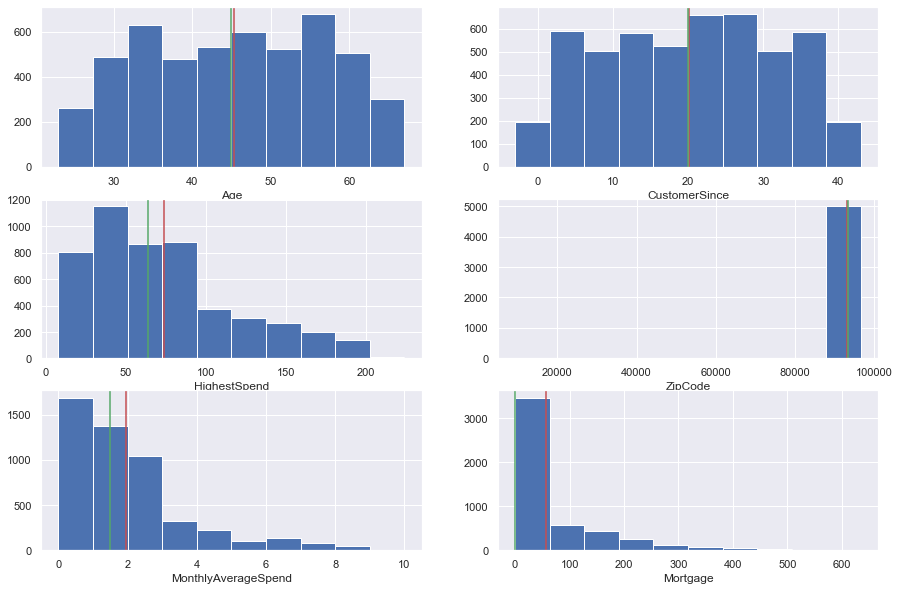

In [23]:
sns.set(rc={'figure.figsize':(15,10)})
for i,j in enumerate(data[visualisation]):
    plt.subplot(3,2,i+1)
    plt.hist(data[j])
    plt.xlabel(j)
    plt.axvline(data[j].mean(),color="r")
    plt.axvline(data[j].median(),color="g")

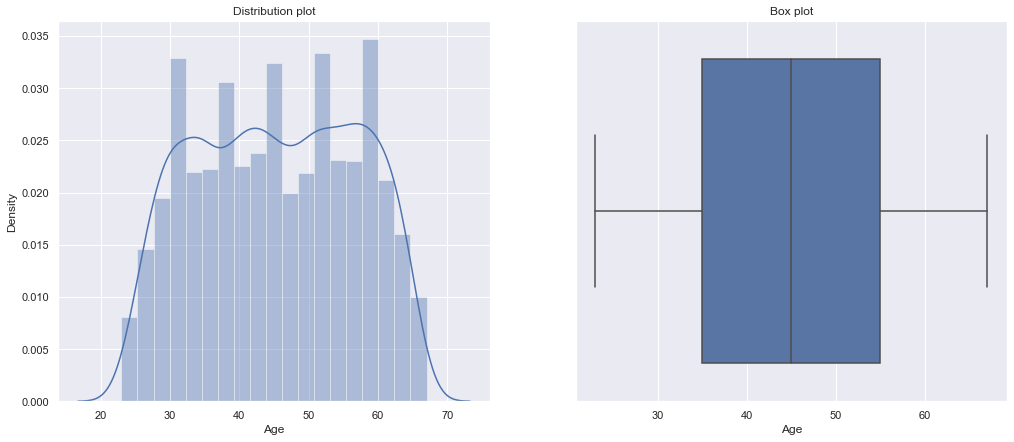

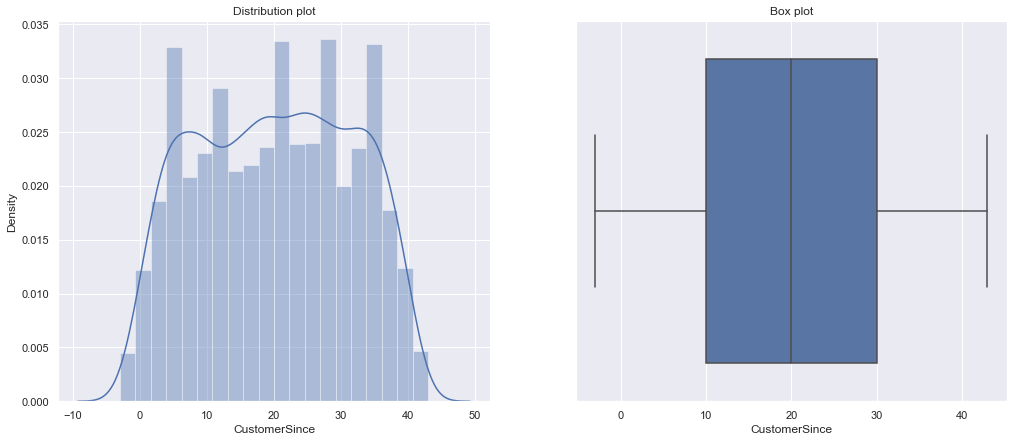

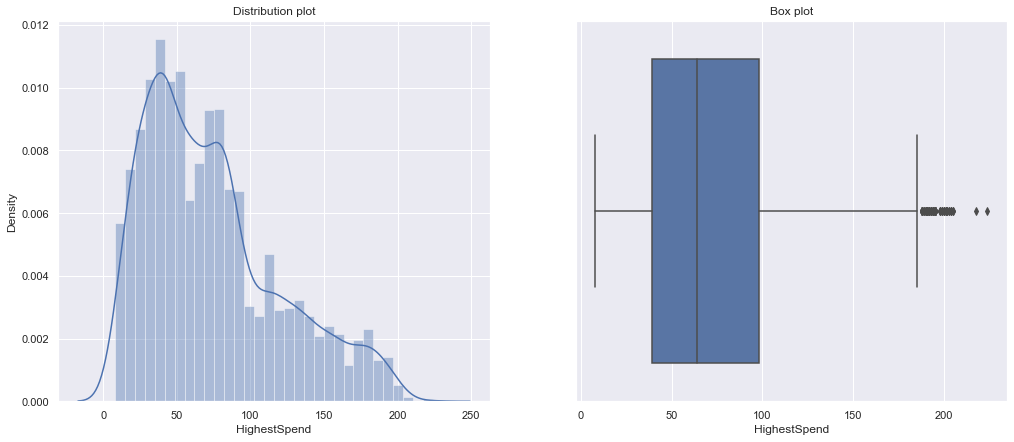

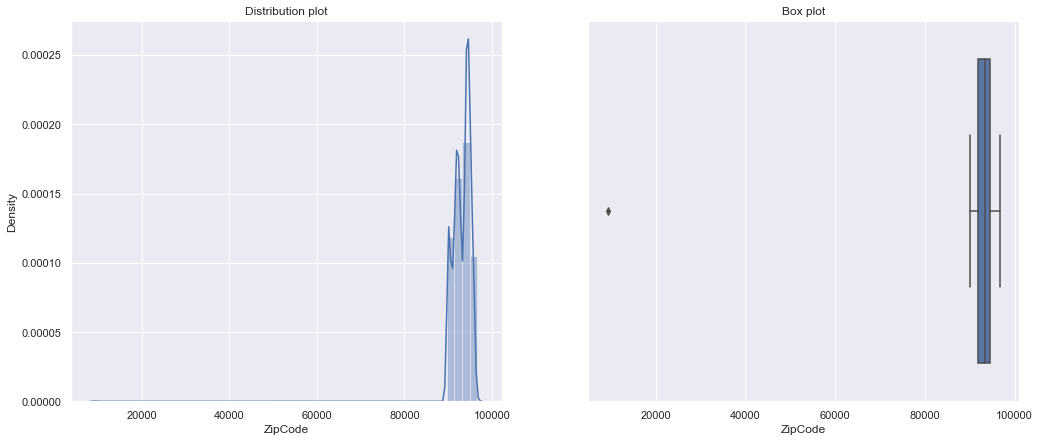

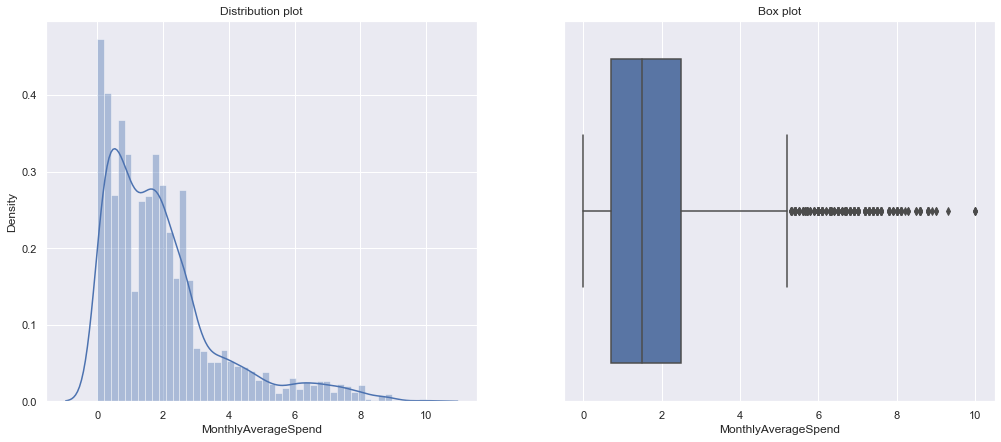

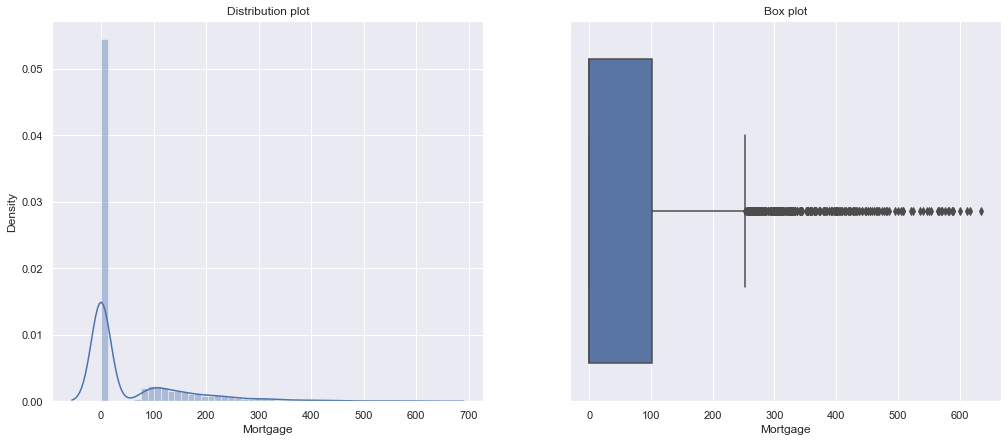

In [24]:
for i,var in enumerate(data[visualisation]):
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = var, data=data,  orient='h' , ax=axes[1])
    sns.distplot(data[var],  ax=axes[0])
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
    plt.show()

In [25]:
data_dup=data.copy()

## visualising categorical columns

In [26]:
cat_col=['HiddenScore',
        'Level', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

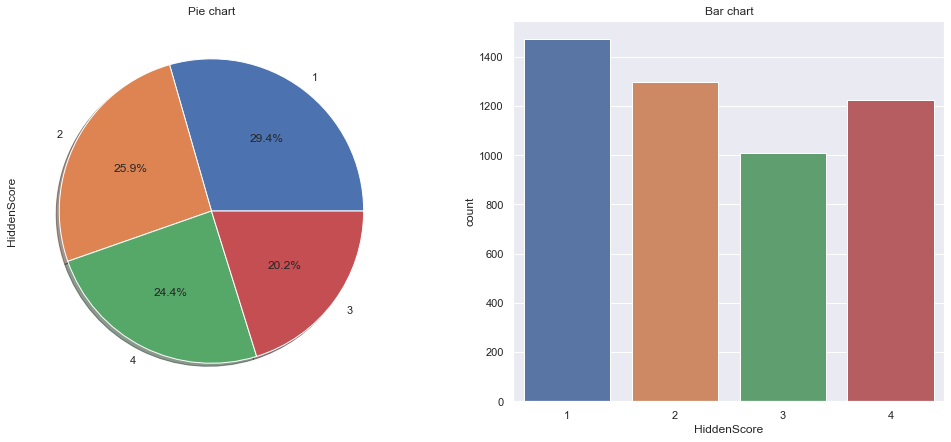

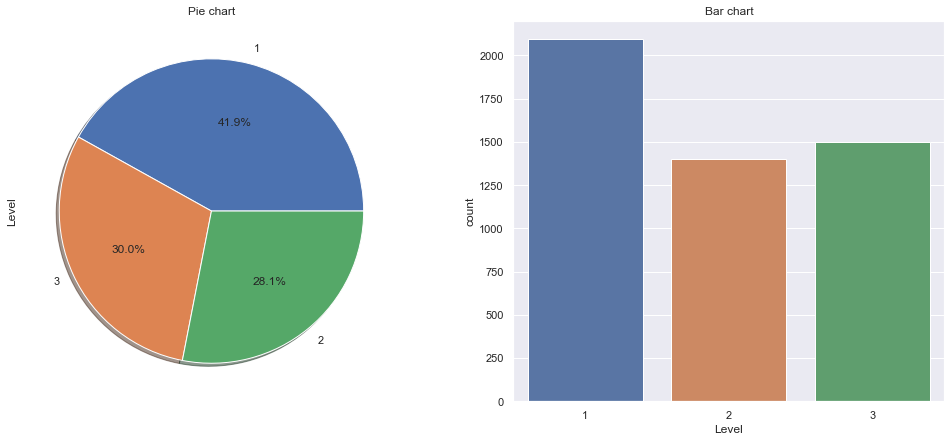

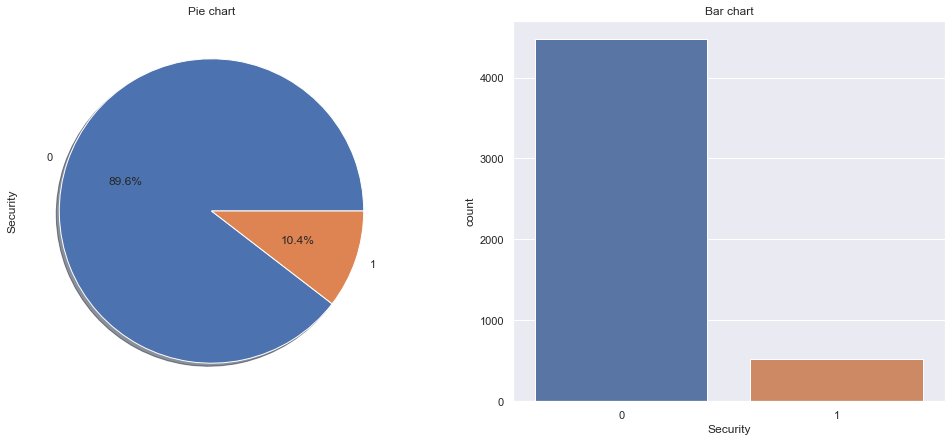

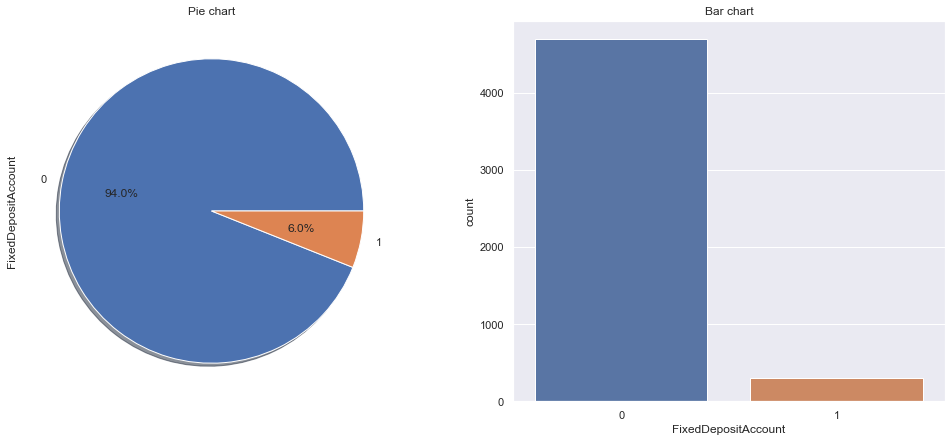

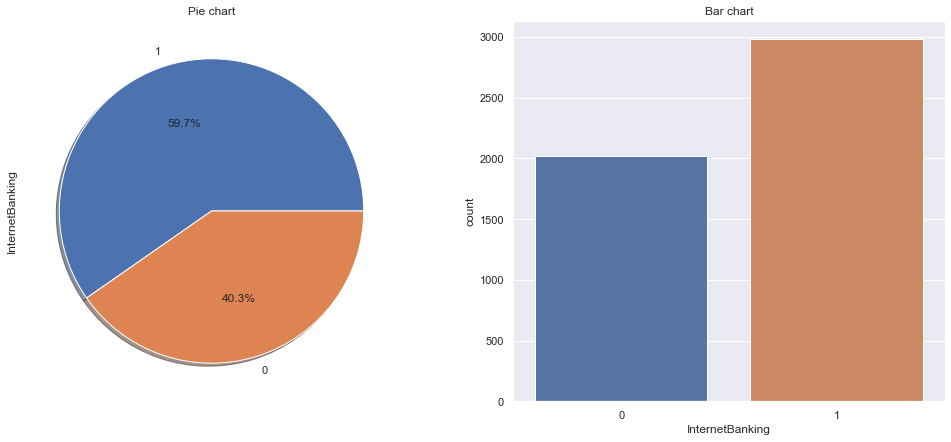

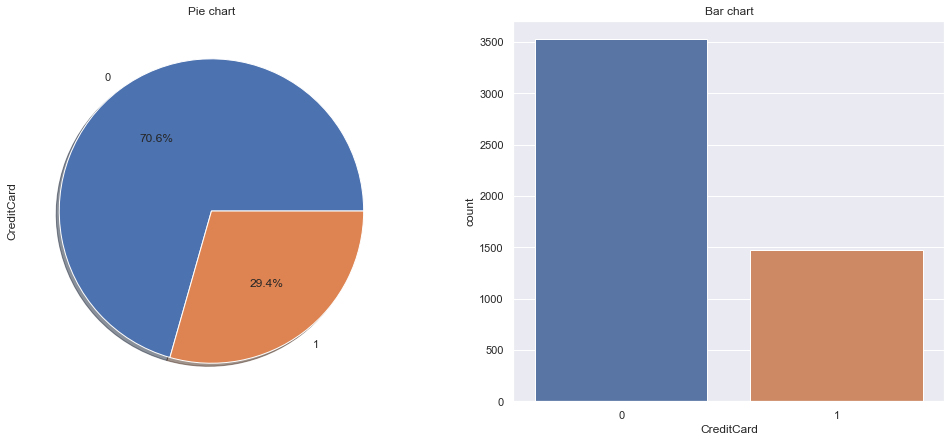

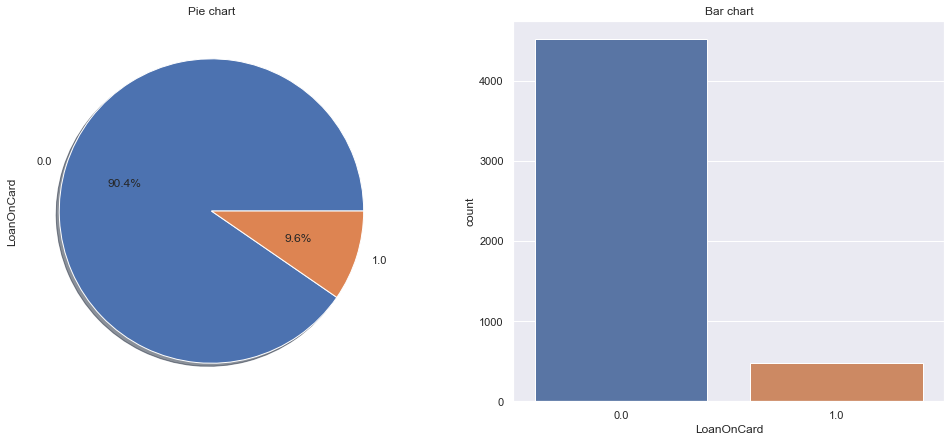

In [27]:
for id,var in enumerate(data[cat_col]):
    fig,ax= plt.subplots(1, 2, figsize=(17,7))
    data[var].value_counts().plot(kind="pie",autopct='%1.1f%%',ax=ax[0],shadow=True)
    plt.xlabel(var)
    sns.countplot(data[var],ax=ax[1])
    plt.xlabel(var)
    ax[0].set_title("Pie chart")
    ax[1].set_title("Bar chart")

<AxesSubplot:xlabel='Age'>

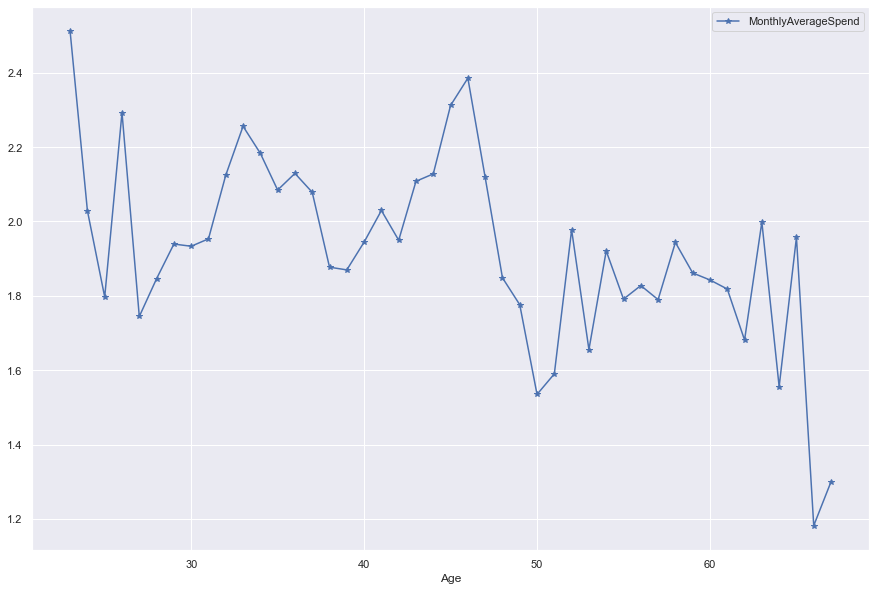

In [28]:
sns.set(rc={"figure.figsize":(15,10)})
data[["Age",'MonthlyAverageSpend']].groupby("Age").mean().plot(marker="*")

<AxesSubplot:xlabel='Age'>

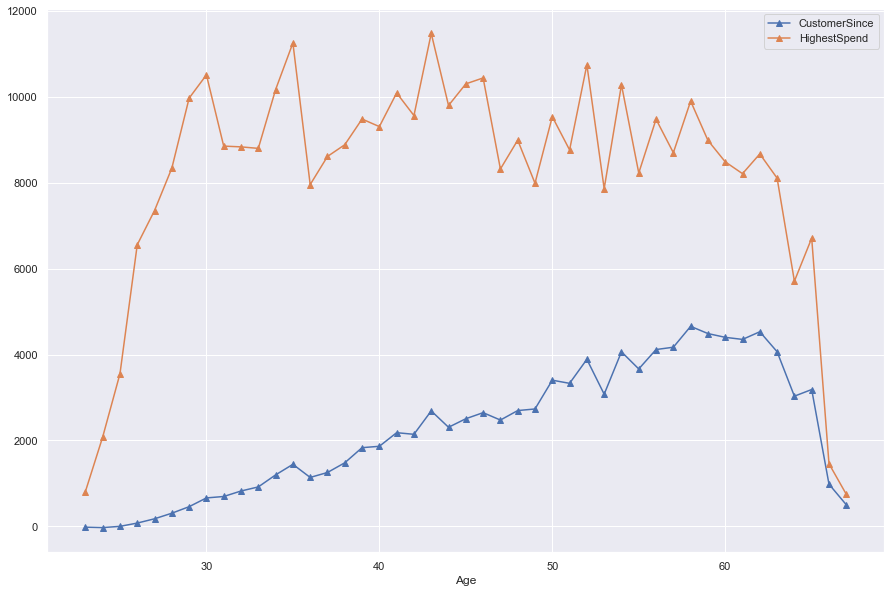

In [29]:
data[["Age","CustomerSince","HighestSpend"]].groupby("Age").sum().plot(marker="^")

<AxesSubplot:xlabel='MonthlyAverageSpend', ylabel='HighestSpend'>

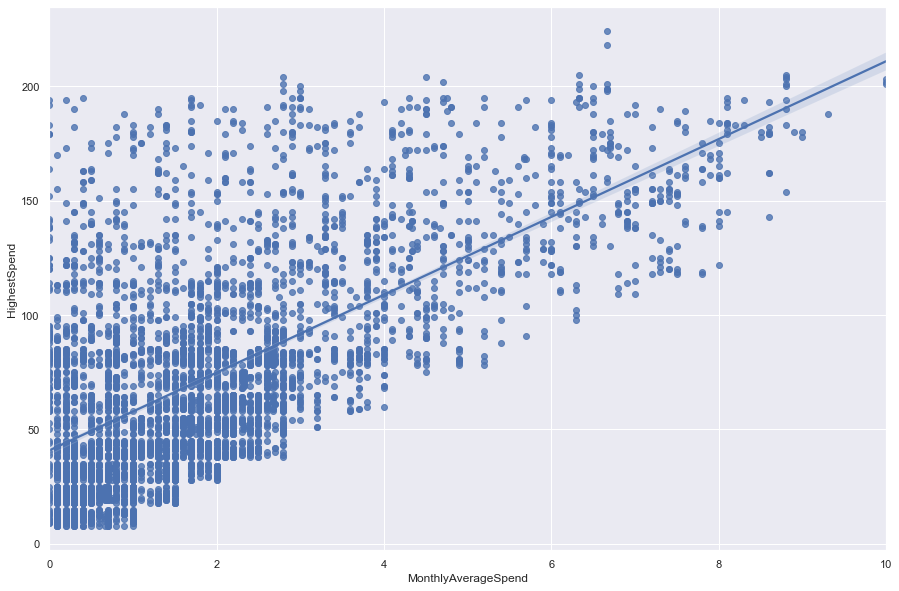

In [30]:
sns.regplot(data=data,x='MonthlyAverageSpend',y='HighestSpend')

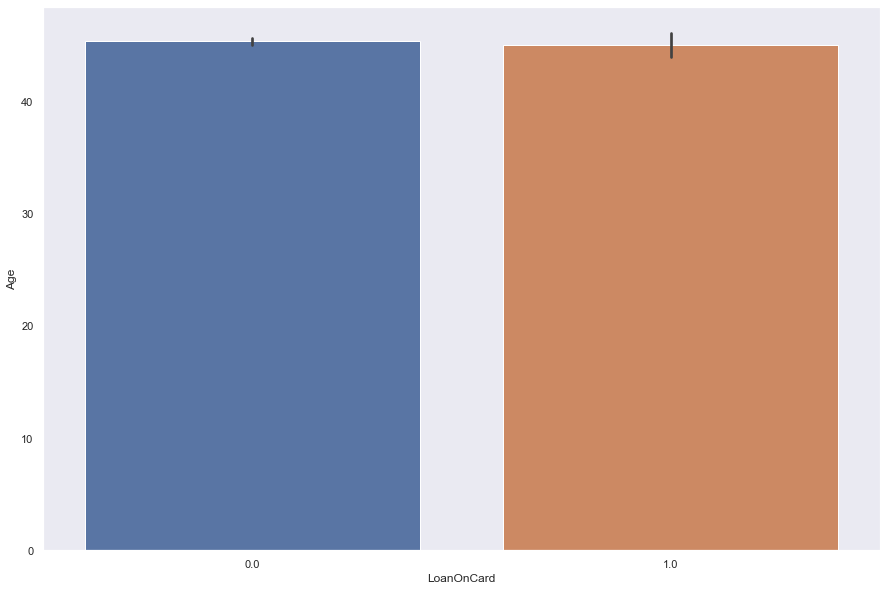

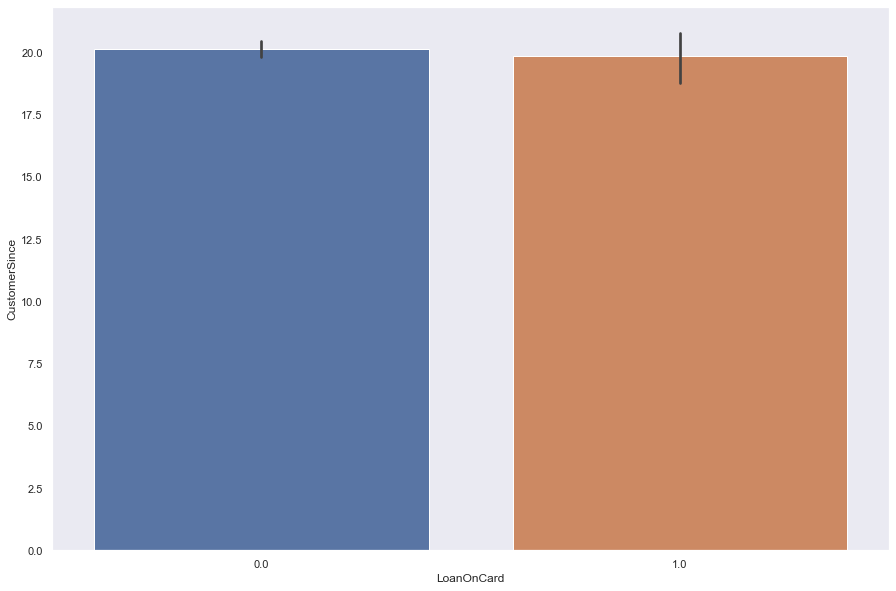

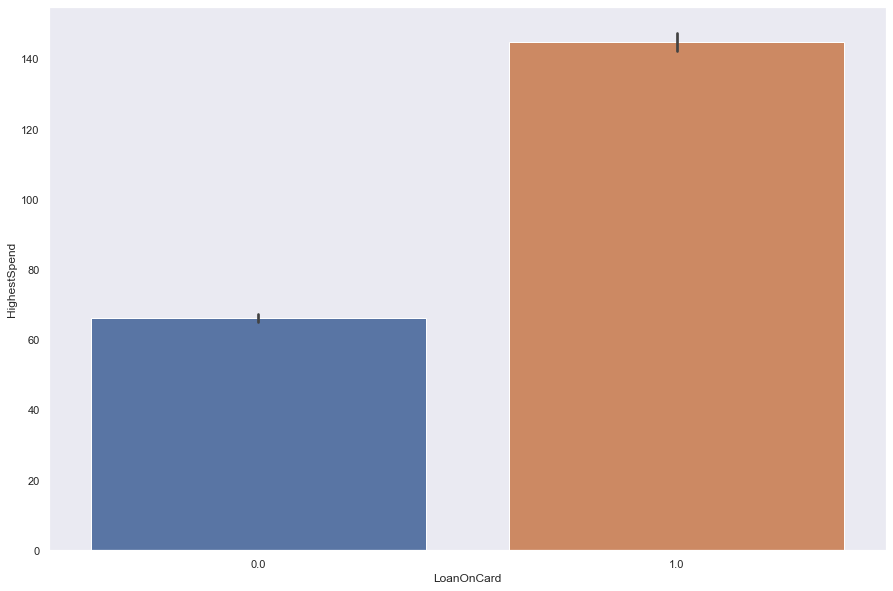

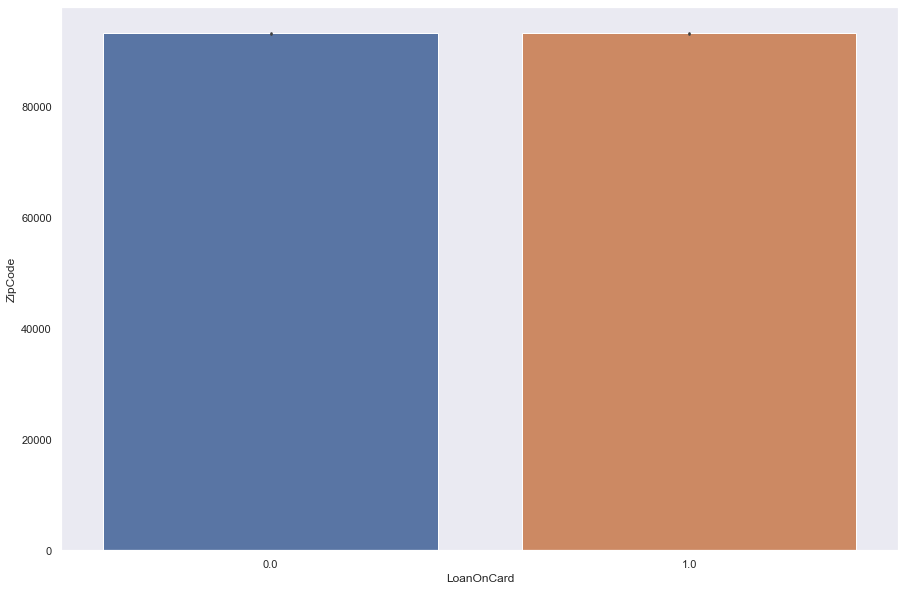

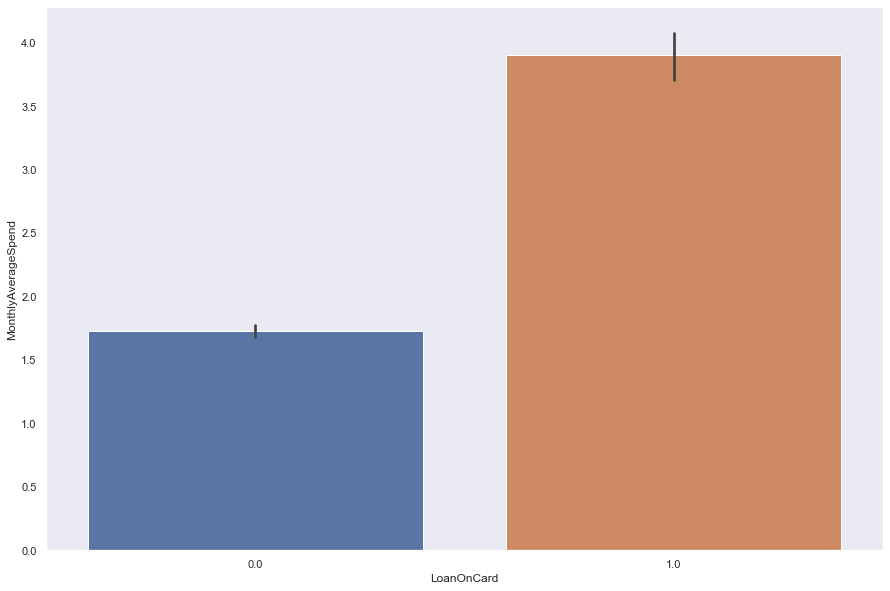

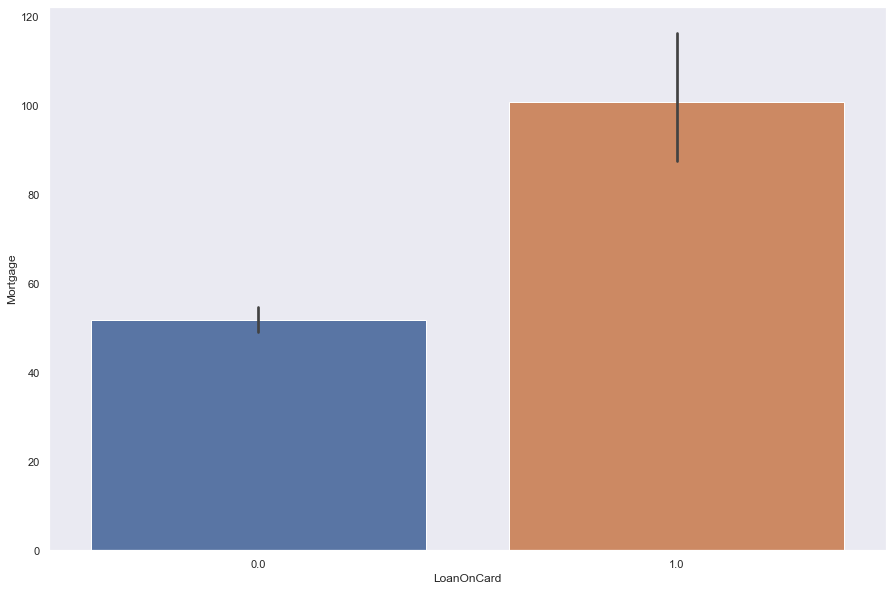

In [31]:
for i in visualisation:
    sns.barplot(data["LoanOnCard"],data[i])
    plt.grid(axis ='y')
    plt.show()

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

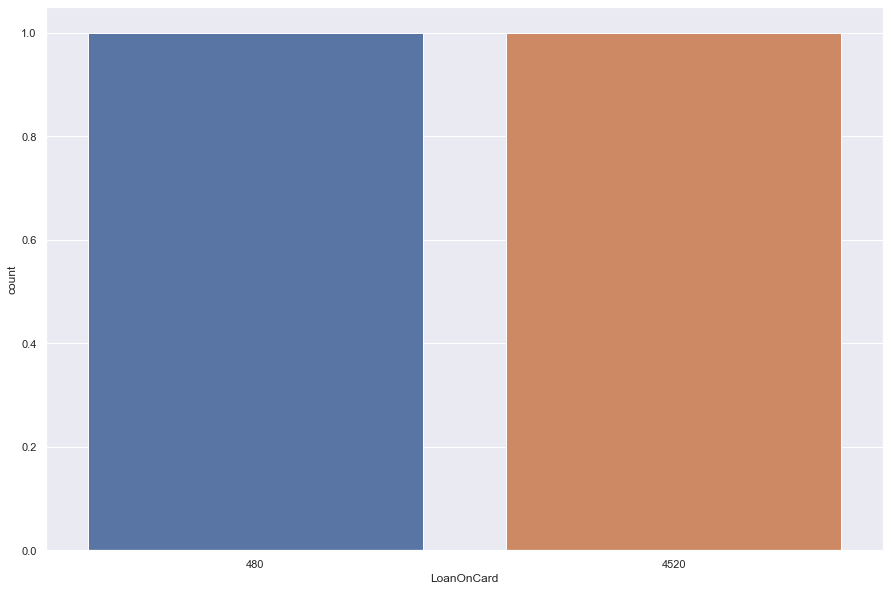

In [32]:
sns.countplot(data["LoanOnCard"].value_counts())

In [33]:
data.corr().style.background_gradient("magma")

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994215,-0.055269,-0.029216,-0.052012,-0.012539
CustomerSince,0.994215,1.000000,-0.046574,-0.028626,-0.050077,-0.010582
HighestSpend,-0.055269,-0.046574,1.000000,-0.016410,0.645984,0.206806
ZipCode,-0.029216,-0.028626,-0.016410,1.000000,-0.004061,0.007383
MonthlyAverageSpend,-0.052012,-0.050077,0.645984,-0.004061,1.000000,0.109905
Mortgage,-0.012539,-0.010582,0.206806,0.007383,0.109905,1.000000


### Age and customer since has correlation as almost 1. Any one can be used for the model.Highest spend has large correlation with monthly average spend.Mortage and highest spend has little correlation.Rest of the variables does not have any relation

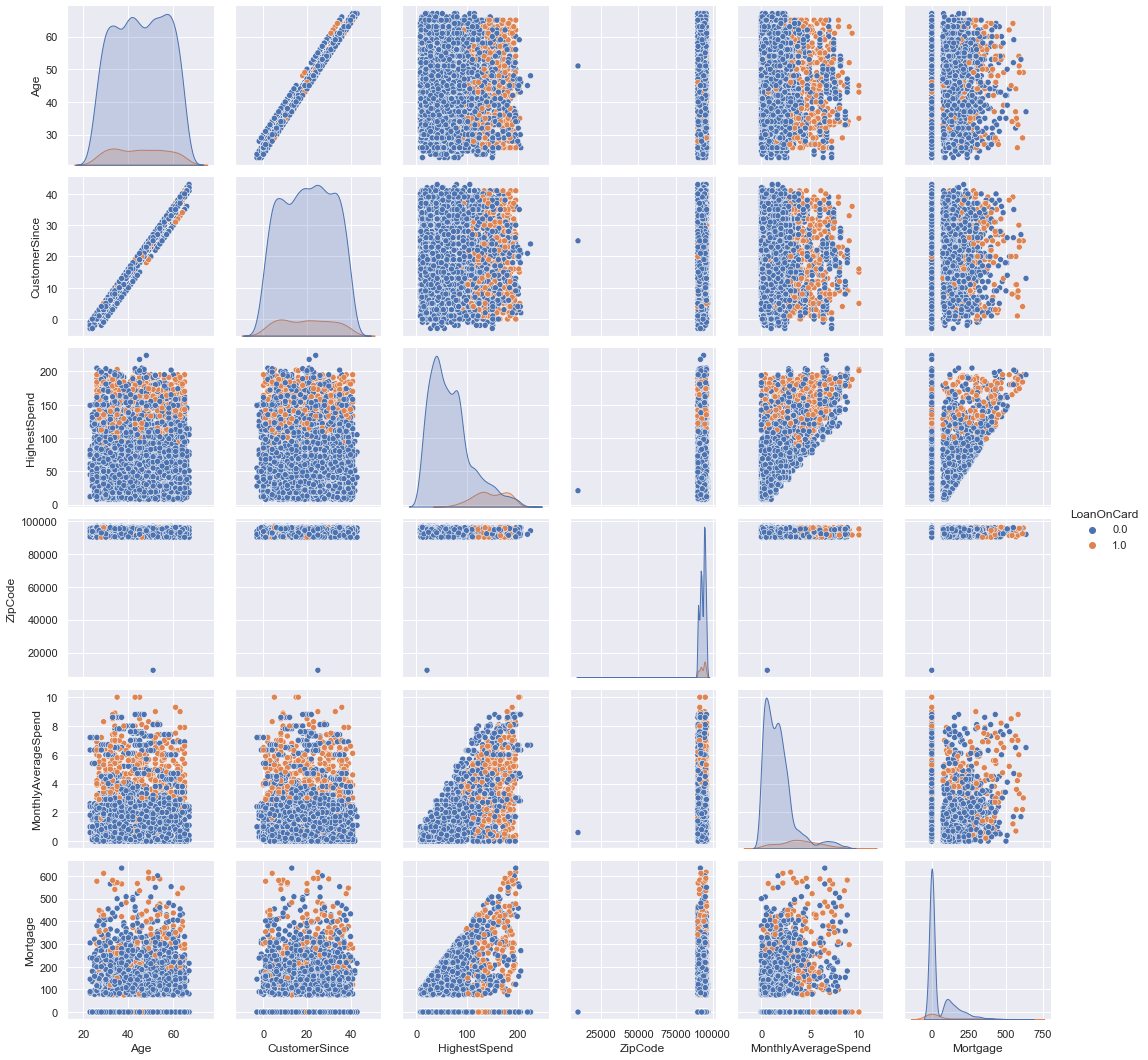

In [34]:
sns.pairplot(data,hue="LoanOnCard")

# Hypothesis Testing
We can statistically check whether all the independent variables has significant effect on target variables

In [35]:
data.groupby("LoanOnCard").mean()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
LoanOnCard,,,,,,
0.0,45.367257,20.132301,66.237389,93152.428761,1.729009,51.789381
1.0,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


# HigestSpend has huge difference from non Loan customers

### Except HigestSpend all values are likely to be the same

In [36]:
num_cols=data.select_dtypes(include=['int64','float64']).columns
print(num_cols)

Index(['Age', 'CustomerSince', 'HighestSpend', 'ZipCode',
       'MonthlyAverageSpend', 'Mortgage'],
      dtype='object')


### HO(Null Hypothesis)=There is no significant difference from independent features to the Target variables

### H1(Alternate Hypothesis)=There is a noticiable significant difference from independent features to the Target variables

In [37]:
for i in num_cols:
    x = np.array(data[data.LoanOnCard == 0][i]) 
    y = np.array(data[data.LoanOnCard == 1][i])
    stats, p_value  = ztest(x,y) 
    print(' P_Value:{}'.format(p_value))
    if p_value < 0.05:  
        print('Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format(i))
    else:
        print(' Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format(i))
    print('\n')

 P_Value:0.5849348846470401
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.6002126432530691
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:0.0
Rejecting Null Hypothesis.HighestSpend of Loan holders and non-Loan holders are not same


 P_Value:0.9939432078059965
 Fail to Reject Null Hypothesis.ZipCode of Loan holders and non-Loan holders are  same


 P_Value:4.395090072761741e-171
Rejecting Null Hypothesis.MonthlyAverageSpend of Loan holders and non-Loan holders are not same


 P_Value:3.3608575419194614e-24
Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




### Only HighestSpend,Mortgage and MonthlyAverageSpend have significant different and are useful to the target variable prediction adding to that all variables can be dropped

In [38]:
data.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

### Testing on catagorical features

### HO(Null Hypothesis)=There is no significant difference from independent catagorical features to the Target variables


### H1(Alternate Hypothesis)=There is a noticiable significant difference from independent  catagorical features to the Target variables

In [39]:
cat_col.remove("LoanOnCard")

In [40]:
cat_col

['HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard']

In [41]:
for i in cat_col:
    print(pd.crosstab(data['LoanOnCard'],data[i]))
    print('\n')

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1365  1190  877  1088
1.0           107   106  133   134


Level          1     2     3
LoanOnCard                  
0.0         2003  1221  1296
1.0           93   182   205


Security       0    1
LoanOnCard           
0.0         4058  462
1.0          420   60


FixedDepositAccount     0    1
LoanOnCard                    
0.0                  4358  162
1.0                   340  140


InternetBanking     0     1
LoanOnCard                 
0.0              1827  2693
1.0               189   291


CreditCard     0     1
LoanOnCard            
0.0         3193  1327
1.0          337   143




In [42]:
cross_tab=pd.crosstab(data['LoanOnCard'],data["HiddenScore"])
chi_sq_Stat, p_val, deg_freedom, exp_freq=chi2_contingency(cross_tab)
if p_val<0.05:
    print(p_val)
    print("Reject the null hypothesis of {}".format("HiddenScore"),"  not the same  and has effect")
else:
    print(p_val)
    print("Fail to Reject the null hypothesis of {}".format("HiddenScore")," are the same  and has no effect ")
print("\n")


1.6144121228248757e-06
Reject the null hypothesis of HiddenScore   not the same  and has effect




### since HiddenScore has effect we won't be dropping it !

In [43]:
cross_tab=pd.crosstab(data['LoanOnCard'],data["Level"])
chi_sq_Stat, p_val, deg_freedom, exp_freq=chi2_contingency(cross_tab)
if p_val<0.05:
    print(p_val)
    print("Reject the null hypothesis of {}".format("HiddenScore"),"  not the same  and has effect")
else:
    print(p_val)
    print("Fail to Reject the null hypothesis of {}".format("HiddenScore")," are the same  and has no effect ")
print("\n")


6.991473868665428e-25
Reject the null hypothesis of HiddenScore   not the same  and has effect




#### similarly Level has effect we won't be dropping it !

In [44]:
cat_col.remove("HiddenScore")
cat_col.remove("Level")

In [45]:
cat_col

['Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']

In [46]:
for i in cat_col:
    cross_tab=(pd.crosstab(data['LoanOnCard'],data[i]))
    chi_sq_Stat, p_val, deg_freedom, exp_freq=chi2_contingency(cross_tab)
    
    if p_val<0.05:
        print(p_val)
        print("Reject the null hypothesis of '{}'".format(i),"  not the same  and has effect")
    else:
        print(p_val)
        print("Fail to Reject the null hypothesis of '{}'".format(i)," are the same  and has no effect ")
    print("\n") 

0.14051497326319357
Fail to Reject the null hypothesis of 'Security'  are the same  and has no effect 


7.398297503329848e-110
Reject the null hypothesis of 'FixedDepositAccount'   not the same  and has effect


0.6928599643141485
Fail to Reject the null hypothesis of 'InternetBanking'  are the same  and has no effect 


0.8843861223314504
Fail to Reject the null hypothesis of 'CreditCard'  are the same  and has no effect 




#### Only FixedDepositAccount has impact other features can be dropped

In [47]:
data.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

In [48]:
data.head(2)

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
0,49,4,1.6,1,0,0,0.0
1,34,3,1.5,1,0,0,0.0


# Data pre-processing

In [49]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [50]:
for i,var in enumerate(col):
    q25,q75=np.percentile(data[var],25),np.percentile(data[var],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    print("Lowers value  for ",var,"is",lower)
    print("Upper value  for ",var,"is",upper)
    Outliers=[i for i in data[var] if i < lower or i > upper]
    print('Total Number of outliers before imputing',var,'is',(len(Outliers)))
    print('')
    data_include=data.loc[(data[var]>=lower )& (data[var]<=upper)]
    data_mean=data[var].mean()
    print("Mean of {} is : {} ".format(var,data_mean))
    print('')
    data[var]=np.where(data[var]>upper,data_mean,data[var])
    data[var]=np.where(data[var]<lower,data_mean,data[var])
    print('')
    Outliers=[i for i in data[var] if i < lower or i > upper]
    print('Total Number of outliers after imputing',var,'is',(len(Outliers)))
    print("----------------------------------------------------")
    print('\n')

Lowers value  for  HighestSpend is -49.5
Upper value  for  HighestSpend is 186.5
Total Number of outliers before imputing HighestSpend is 96

Mean of HighestSpend is : 73.7742 


Total Number of outliers after imputing HighestSpend is 0
----------------------------------------------------


Lowers value  for  MonthlyAverageSpend is -2.0
Upper value  for  MonthlyAverageSpend is 5.2
Total Number of outliers before imputing MonthlyAverageSpend is 324

Mean of MonthlyAverageSpend is : 1.9379380000000053 


Total Number of outliers after imputing MonthlyAverageSpend is 0
----------------------------------------------------


Lowers value  for  Mortgage is -151.5
Upper value  for  Mortgage is 252.5
Total Number of outliers before imputing Mortgage is 291

Mean of Mortgage is : 56.4988 


Total Number of outliers after imputing Mortgage is 0
----------------------------------------------------




<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

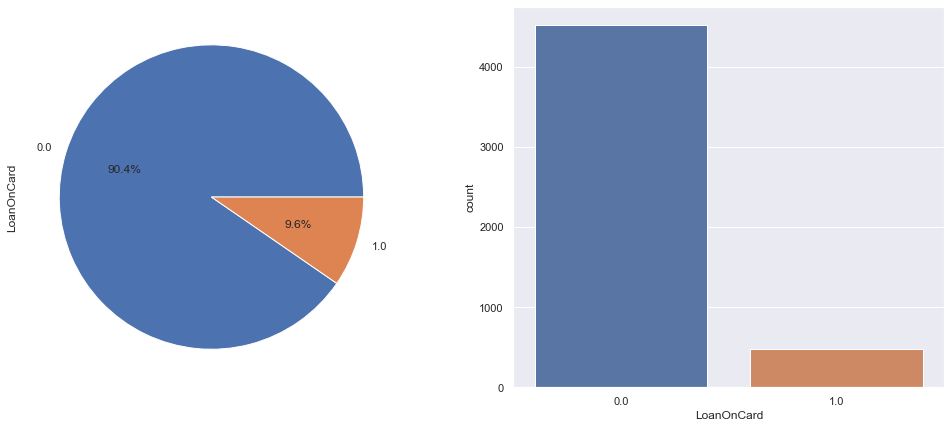

In [51]:
f,axes=plt.subplots(1,2,figsize=(17,7))
data["LoanOnCard"].value_counts().plot(kind="pie",autopct="%1.1f%%",ax=axes[0])
sns.countplot(data["LoanOnCard"],ax=axes[1])

### There is a huge imbalance in the data therefore we will be using oversampling method to resample the data to get balanced

#### predictors vs target attributes

In [52]:
target=data[["LoanOnCard"]]
predictor=data.iloc[:,:-1]

#### Check for target balancing and fix it if found imbalanced

In [53]:
predictor.columns

Index(['HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level',
       'Mortgage', 'FixedDepositAccount'],
      dtype='object')

In [54]:
num_d=data.select_dtypes(include=['float']).columns

In [55]:
scaler=StandardScaler()
predictor[num_d]=scaler.fit_transform(predictor[num_d])

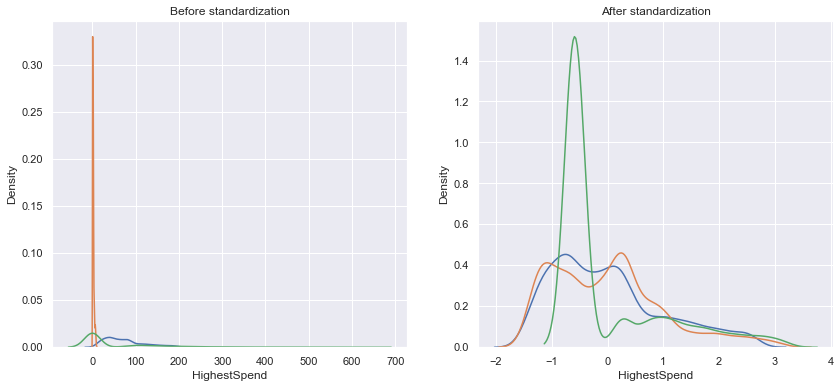

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
ax1.set_title('Before standardization')
for i in num_d:
    sns.kdeplot(data_dup[i], ax=ax1)

ax2.set_title('After standardization')
for i in num_d:
    sns.kdeplot(predictor[i], ax=ax2)
plt.show()

# Train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(predictor,target, test_size=0.30, random_state=1)

In [58]:
print(x_train.shape)
print(x_test.shape)

(3500, 6)
(1500, 6)


# Model training, testing and tuning

In [59]:
lgr=LogisticRegression(solver="liblinear",class_weight=None)
lgr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [60]:
yhat=lgr.predict(x_test)

General Logistic Regression Accuracy_score:  0.9413333333333334
Logistic Regression Score from train set  0.9522857142857143
Logistic Regression Score from test set  0.9413333333333334
Area under the curve 0.7435108967257662
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1351
         1.0       0.85      0.50      0.63       149

    accuracy                           0.94      1500
   macro avg       0.90      0.74      0.80      1500
weighted avg       0.94      0.94      0.93      1500



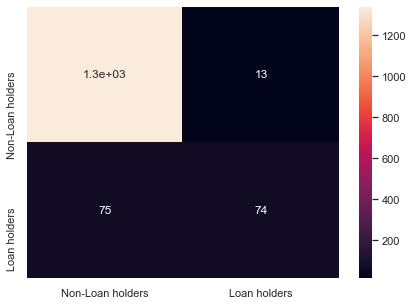

In [61]:
print("General Logistic Regression Accuracy_score: ",accuracy_score(y_test,yhat))
print("Logistic Regression Score from train set ", lgr.score(x_train,y_train))
print("Logistic Regression Score from test set ", lgr.score(x_test,y_test))
print('Area under the curve',metrics.roc_auc_score(y_test,yhat))
plt.figure(figsize = (7,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,yhat),index = [i for i in ["Non-Loan holders","Loan holders"]],columns=[i for i in ["Non-Loan holders","Loan holders"]] ),annot=True)
print(metrics.classification_report(y_test,yhat))

#### model  is already doing good but recall score for target value 1 is less  therfore steps has to be taken 

# we have now replaced the outliers withe the mean values

In [62]:
target.value_counts(normalize=True)

LoanOnCard
0.0           0.904
1.0           0.096
dtype: float64

Train score:  0.882
Test score:  0.886
Area under the curve:  0.8740157675895063
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1351
         1.0       0.46      0.86      0.60       149

    accuracy                           0.89      1500
   macro avg       0.72      0.87      0.77      1500
weighted avg       0.93      0.89      0.90      1500




<AxesSubplot:>

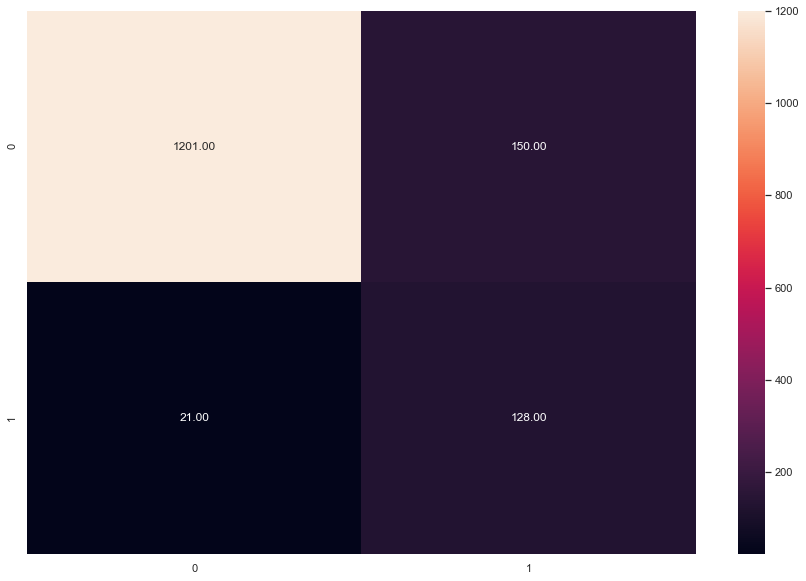

In [63]:
w = {0:10, 1:90}
lg=LogisticRegression(solver='liblinear',class_weight=w)
lg.fit(x_train,y_train)
yhat=lg.predict(x_test)
print("Train score: ",lg.score(x_train,y_train))
print('Test score: ',lg.score(x_test,y_test))
print("Area under the curve: ",roc_auc_score(y_test,yhat))
print(classification_report(y_test,yhat))
print("")
sns.heatmap(confusion_matrix(y_test, yhat),annot=True,fmt='.2f')

#### overall score has decreased but still recall score has balanced with target values on the otherhand precision has dropped

### Using SMOTENCfor Data Balancing

In [64]:
smote_nc = SMOTENC(categorical_features=[1,3,5], random_state=42)
X_train, Y_train = smote_nc.fit_resample(x_train, y_train)

In [65]:
print(y_train.value_counts(normalize=True))
print(Y_train.value_counts(normalize=True))

LoanOnCard
0.0           0.905429
1.0           0.094571
dtype: float64
LoanOnCard
0.0           0.5
1.0           0.5
dtype: float64


Train score:  0.8733038813505838
Test score:  0.878
Area under the curve:  0.8740157675895063
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1351
         1.0       0.46      0.86      0.60       149

    accuracy                           0.89      1500
   macro avg       0.72      0.87      0.77      1500
weighted avg       0.93      0.89      0.90      1500



<AxesSubplot:>

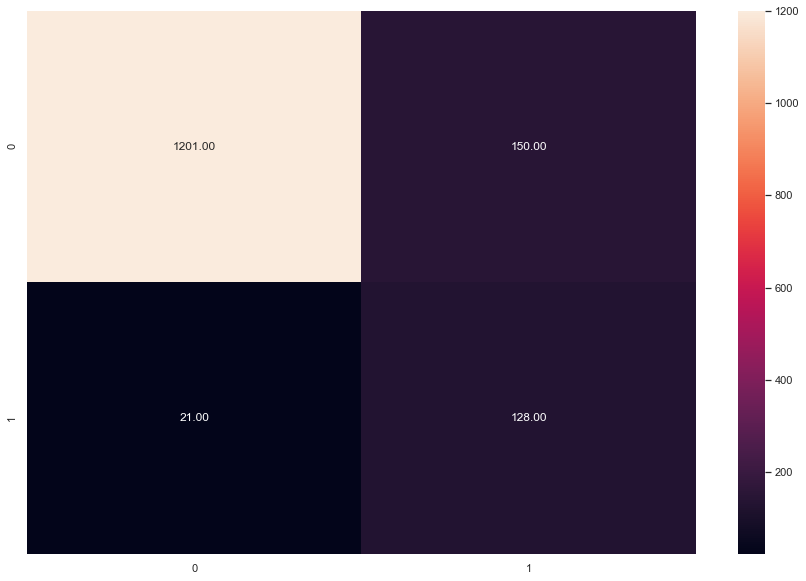

In [66]:
log=LogisticRegression(solver='liblinear',class_weight=None)
log.fit(X_train,Y_train)
yhat=lg.predict(x_test)
print("Train score: ",log.score(X_train,Y_train))
print('Test score: ',log.score(x_test,y_test))
print("Area under the curve: ",roc_auc_score(y_test,yhat))
print(classification_report(y_test,yhat))
sns.heatmap(confusion_matrix(y_test, yhat),annot=True,fmt='.2f')

### tuning Hyperparameters for logistic regression

In [67]:
logreg = LogisticRegression(class_weight=w)
hyperparam_grid = {"class_weight": [w]
                   ,"penalty": ["l2"]
                   ,"C": [100, 10, 1.0, 0.1, 0.01]
                    }

best_model = GridSearchCV(logreg,hyperparam_grid,scoring='roc_auc',cv=10)
best_model.fit(predictor,target)
print('Best roc_auc: {:.4}, with best C: {}'.format(best_model.best_score_, best_model.best_params_))

Best roc_auc: 0.9527, with best C: {'C': 1.0, 'class_weight': {0: 10, 1: 90}, 'penalty': 'l2'}


### after tuning hyperparameters best ROC achieved is 95.2

#### Naive Bayes 
it will suffer if the data is of different type therefore we change their type before modeling

In [68]:
bin1=[-1.43,-.76,-.22,.53,3.3]
values1=["low","Average","high","Very High"]
predictor["HighestSpend_bin"]=pd.cut(predictor["HighestSpend"],bin1,labels=values1)

In [69]:
bin1=[-1.2,-.71,-.26,.33,4.7]
values1=["low","Average","high","Very High"]
predictor["MonthlyAverageSpend_bin"]=pd.cut(predictor["MonthlyAverageSpend"],bin1,labels=values1)

In [70]:
bin1=[-.6,-.5,.44,5.7]
values1=["No","Moderate","high"]
predictor["Mortgage_bin"]=pd.cut(predictor["Mortgage"],bin1,labels=values1)

In [71]:
predictor["HighestSpend_bin"].value_counts()

high         1353
Average      1213
Very High    1203
low          1159
Name: HighestSpend_bin, dtype: int64

In [72]:
predictor["MonthlyAverageSpend_bin"].value_counts()

Very High    1429
high         1379
low          1084
Average       615
Name: MonthlyAverageSpend_bin, dtype: int64

In [73]:
predictor["Mortgage_bin"].value_counts()

No          3462
high        1247
Moderate     291
Name: Mortgage_bin, dtype: int64

In [74]:
predictor.dtypes

HighestSpend                float64
HiddenScore                category
MonthlyAverageSpend         float64
Level                      category
Mortgage                    float64
FixedDepositAccount        category
HighestSpend_bin           category
MonthlyAverageSpend_bin    category
Mortgage_bin               category
dtype: object

In [75]:
LB=LabelEncoder()
predictor.loc[:,["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]]=predictor.loc[:,["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]].apply(LB.fit_transform)
predictor[["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]]=predictor[["HighestSpend_bin","MonthlyAverageSpend_bin","Mortgage_bin"]].astype("category")

In [76]:
predictor.drop(["HighestSpend","MonthlyAverageSpend","Mortgage"],axis=1,inplace=True)

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(predictor,target,test_size=0.30,random_state=1)

In [78]:
Y_train.value_counts(normalize=True)

LoanOnCard
0.0           0.905429
1.0           0.094571
dtype: float64

# CategoricalNB()

CategoricalNB
Misclassified samples: [LoanOnCard    40
dtype: int64, LoanOnCard    37
dtype: int64, LoanOnCard    38
dtype: int64, LoanOnCard    48
dtype: int64, LoanOnCard    39
dtype: int64, LoanOnCard    32
dtype: int64, LoanOnCard    35
dtype: int64, LoanOnCard    38
dtype: int64, LoanOnCard    36
dtype: int64, LoanOnCard    34
dtype: int64]
Best Training Accuracy: 0.9266666666666666
Best Test Accuracy:  0.936
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       452
         1.0       0.77      0.42      0.54        48

    accuracy                           0.93       500
   macro avg       0.86      0.70      0.75       500
weighted avg       0.92      0.93      0.92       500



<AxesSubplot:>

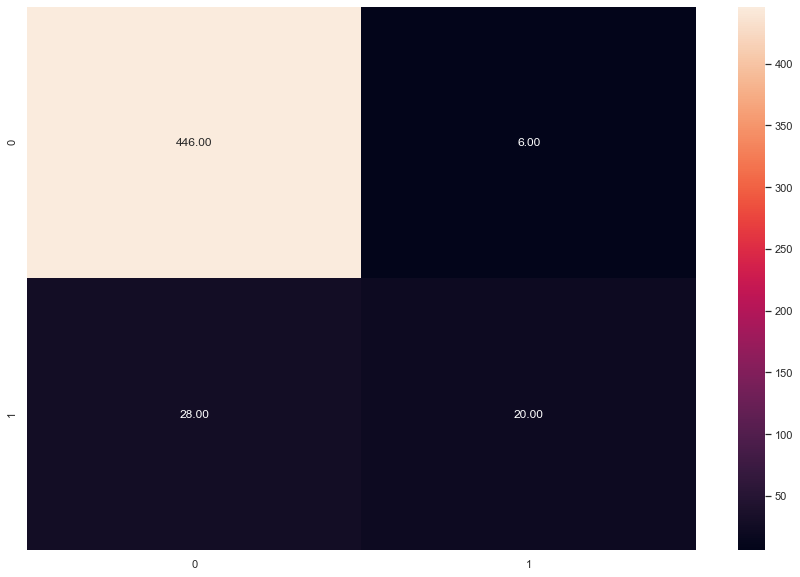

In [82]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cnb = CategoricalNB()
gnb = GaussianNB()
countcnb=[]
recall=[]
trainscore=[]
testscore=[]
for train_ix, test_ix in kfold.split(predictor, target):
        X_train_res, X_test_res = predictor.iloc[train_ix], predictor.iloc[test_ix]
        y_train_res, y_test_res = target.iloc[train_ix], target.iloc[test_ix]
        cnb.fit(X_train_res, y_train_res)
        y_pred_cnb = cnb.predict(X_test_res)
        count_misclassified = (y_test_res != y_pred_cnb.reshape(-1,1)).sum()
        countcnb.append(count_misclassified)
        score1=cnb.score(X_train_res,y_train_res)   
        score2=cnb.score(X_test_res,y_test_res) 
        trainscore.append(score1)
        testscore.append(score2)           
                        
print("CategoricalNB")
print("=" * 30)
print('Misclassified samples:',(countcnb))
print('Best Training Accuracy:',(max(trainscore)))
print('Best Test Accuracy: ',(max(testscore)) )

y_pred_cnb=cnb.predict(X_test_res)
print(classification_report(y_test_res,y_pred_cnb))

sns.heatmap(confusion_matrix(y_test_res,y_pred_cnb),annot=True,fmt='.2f')


#### categorialNB does petty good in predicting and holds less miss classification

# GaussianNB()

In [83]:
gnb = GaussianNB()
countcnb=[]
recall=[]
f1=[]
trainscore=[]
testscore=[]
for train_ix, test_ix in kfold.split(predictor, target):
        X_train_res, X_test_res = predictor.iloc[train_ix], predictor.iloc[test_ix]
        y_train_res, y_test_res = target.iloc[train_ix], target.iloc[test_ix]
        gnb.fit(X_train_res, y_train_res)
        y_pred_gnb = gnb.predict(X_test_res)
        count_misclassified = (y_test_res != y_pred_gnb.reshape(-1,1)).sum()
        countcnb.append(count_misclassified)
        score1=gnb.score(X_train_res,y_train_res)   
        score2=gnb.score(X_test_res,y_test_res) 
        trainscore.append(score1)
        testscore.append(score2)           
                        
print("GaussianNB")
print("-" * 30)
print('Misclassified samples:',(countcnb))
print('Best Training Accuracy:',(max(trainscore)))
print('Best Test Accuracy: ',(max(testscore)) )


GaussianNB
------------------------------
Misclassified samples: [LoanOnCard    56
dtype: int64, LoanOnCard    47
dtype: int64, LoanOnCard    39
dtype: int64, LoanOnCard    49
dtype: int64, LoanOnCard    52
dtype: int64, LoanOnCard    36
dtype: int64, LoanOnCard    45
dtype: int64, LoanOnCard    42
dtype: int64, LoanOnCard    44
dtype: int64, LoanOnCard    37
dtype: int64]
Best Training Accuracy: 0.9131111111111111
Best Test Accuracy:  0.928


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       452
         1.0       0.76      0.33      0.46        48

    accuracy                           0.93       500
   macro avg       0.85      0.66      0.71       500
weighted avg       0.92      0.93      0.91       500



<AxesSubplot:>

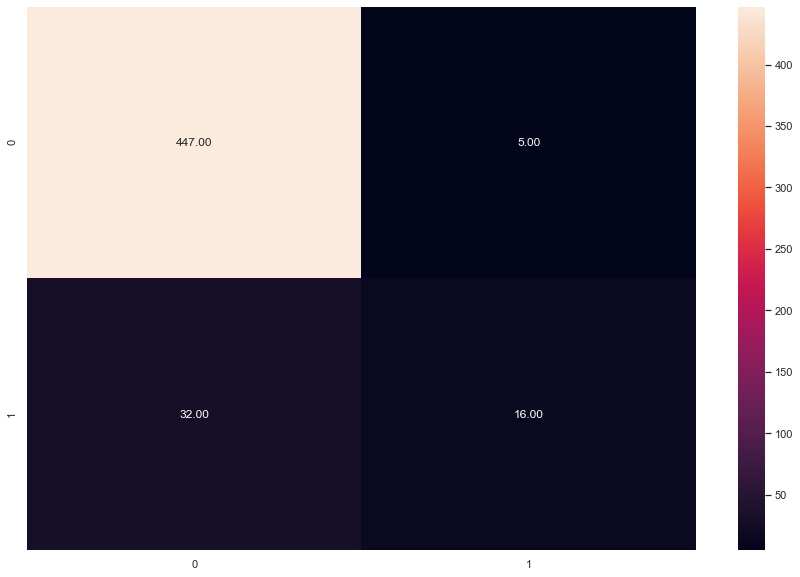

In [84]:
y_pred_gnb = gnb.predict(X_test_res)
print(classification_report(y_test_res,y_pred_gnb))

sns.heatmap(confusion_matrix(y_test_res,y_pred_gnb),annot=True,fmt='.2f')

#### Has good score but still recall values has to be improved

# logisticRegression()

CategoricalNB
Misclassified samples: [LoanOnCard    48
dtype: int64, LoanOnCard    44
dtype: int64, LoanOnCard    50
dtype: int64, LoanOnCard    40
dtype: int64, LoanOnCard    50
dtype: int64, LoanOnCard    46
dtype: int64, LoanOnCard    40
dtype: int64, LoanOnCard    42
dtype: int64, LoanOnCard    45
dtype: int64, LoanOnCard    39
dtype: int64]
Best Training Accuracy: 0.9133333333333333
Best Test Accuracy:  0.922
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       466
         1.0       0.55      0.47      0.51        34

    accuracy                           0.94       500
   macro avg       0.76      0.72      0.74       500
weighted avg       0.93      0.94      0.94       500



<AxesSubplot:>

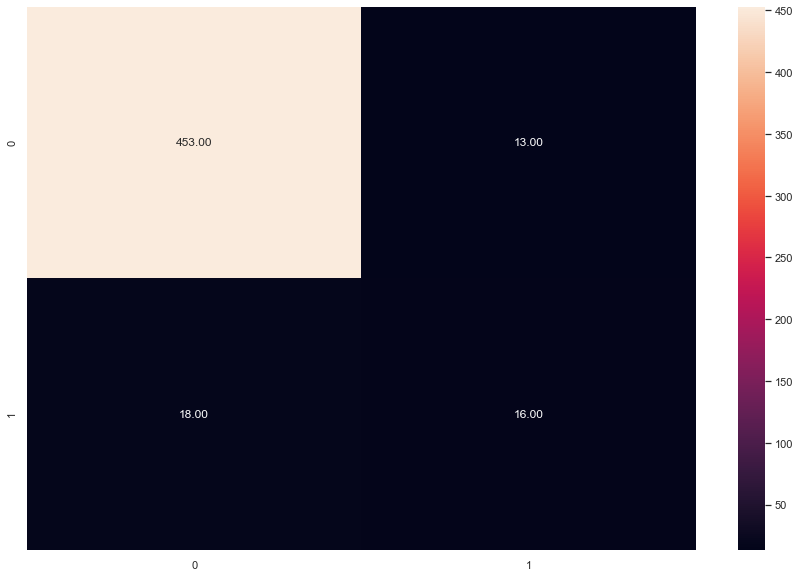

In [88]:
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

lg=LogisticRegression()
countcnb=[]
recall=[]
trainscore=[]
testscore=[]
for train_ix, test_ix in kfold.split(predictor, target):
        X_train_res, X_test_res = predictor.iloc[train_ix], predictor.iloc[test_ix]
        y_train_res, y_test_res = target.iloc[train_ix], target.iloc[test_ix]
        lg.fit(X_train_res, y_train_res)
        y_pred_cnb = lg.predict(X_test_res)
        count_misclassified = (y_test_res != y_pred_cnb.reshape(-1,1)).sum()
        countcnb.append(count_misclassified)
        score1=lg.score(X_train_res,y_train_res)   
        score2=lg.score(X_test_res,y_test_res) 
        trainscore.append(score1)
        testscore.append(score2)           
                        
print("CategoricalNB")
print("=" * 30)
print('Misclassified samples:',(countcnb))
print('Best Training Accuracy:',(max(trainscore)))
print('Best Test Accuracy: ',(max(testscore)) )

y_pred_cnb=cnb.predict(X_test_res)
print(classification_report(y_test_res,y_pred_cnb))

sns.heatmap(confusion_matrix(y_test_res,y_pred_cnb),annot=True,fmt='.2f')


#### Logistic regression and CategoricalNB have almost the same score both interms of precision and recall score so in future it is better to go with either one of them fore better prediction 

#### Hyper tuning on CategoricalNB

In [87]:
gb = CategoricalNB()
hyperparam_grid = { 'fit_prior':[True,False],
                   "alpha": [100, 10, 1.0, 0.1, 0.01]
                    }
kfold = KFold(n_splits=10)
best_model = GridSearchCV(gb,hyperparam_grid,scoring='roc_auc',cv=kfold)
best_model.fit(predictor,target)
print('Best roc_auc: {:.4}, with best C: {}'.format(best_model.best_score_, best_model.best_params_))

Best roc_auc: 0.9445, with best C: {'alpha': 10, 'fit_prior': True}


### Best roc_auc: 0.9445 CategoricalNB is able to predict welll the GaussianNB

### Conclusion